simulation 1 : main effect

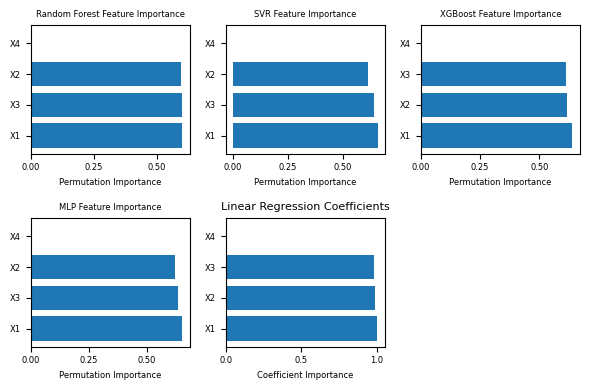

In [8]:
import numpy as np
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

np.random.seed(42)
num_samples = 2000

# Generating each feature separately
X1 = np.random.randn(num_samples)  # Feature 1
X2 = np.random.randn(num_samples)  # Feature 2
X3 = np.random.randn(num_samples)  # Feature 3
X4 = np.random.randn(num_samples)  # Feature 4

# Target variable (y) as the sum of features plus noise
noise = np.random.normal(0, 0.5, num_samples)  # Adding noise
y = X1 + X2 + X3 + noise

# Creating a DataFrame
data = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4,'y': y})

# Features and Target
X = data[['X1', 'X2', 'X3', 'X4']]
y = data['y']

# Splitting the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting different regression models
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Support Vector Machine Regression
svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train, y_train)

# XGBoost Regression
xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)

# Multi-layer Perceptron Regression
mlp_reg = MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
mlp_reg.fit(X_train, y_train)

# Dictionary to store feature importance results
fi_results = {}

# RandomForestRegressor
rf_fi = permutation_importance(rf_reg, X_test, y_test, n_repeats=30, random_state=42)
fi_results['Random Forest'] = rf_fi.importances_mean

# SVR
svm_fi = permutation_importance(svm_reg, X_test, y_test, n_repeats=30, random_state=42)
fi_results['SVR'] = svm_fi.importances_mean

# XGBRegressor
xgb_fi = permutation_importance(xgb_reg, X_test, y_test, n_repeats=30, random_state=42)
fi_results['XGBoost'] = xgb_fi.importances_mean

# MLPRegressor
mlp_fi = permutation_importance(mlp_reg, X_test, y_test, n_repeats=30, random_state=42)
fi_results['MLP'] = mlp_fi.importances_mean

fi_results['Linear Regression'] = np.abs(linear_reg.coef_)
# Plotting feature importances for each model
plt.figure(figsize=(6, 4))

for i, (model, fi) in enumerate(fi_results.items(), 1):
    plt.subplot(2, 3, i)
    if model != 'Linear Regression':
        fi = fi_results[model]
        sorted_idx = np.argsort(fi)[::-1]
        plt.barh(range(X.shape[1]), fi[sorted_idx], align='center')
        plt.yticks(range(X.shape[1]), X.columns[sorted_idx], fontsize=6)  # Adjust font size for y-ticks
        plt.xlabel('Permutation Importance', fontsize=6)  # Adjust font size for x-label
        plt.title(f'{model} Feature Importance', fontsize=6)  # Adjust font size for title
    else:
        fi = fi_results[model]
        sorted_idx = np.argsort(fi)[::-1]
        plt.barh(range(X.shape[1]), fi[sorted_idx], align='center')
        plt.yticks(range(X.shape[1]), X.columns[sorted_idx], fontsize=6)  # Adjust font size for y-ticks
        plt.xlabel('Coefficient Importance', fontsize=6)  # Adjust font size for x-label
        plt.title(f'{model} Coefficients', fontsize=8)  # Adjust font size for title
    plt.xticks(fontsize=6)
plt.tight_layout()
plt.show()

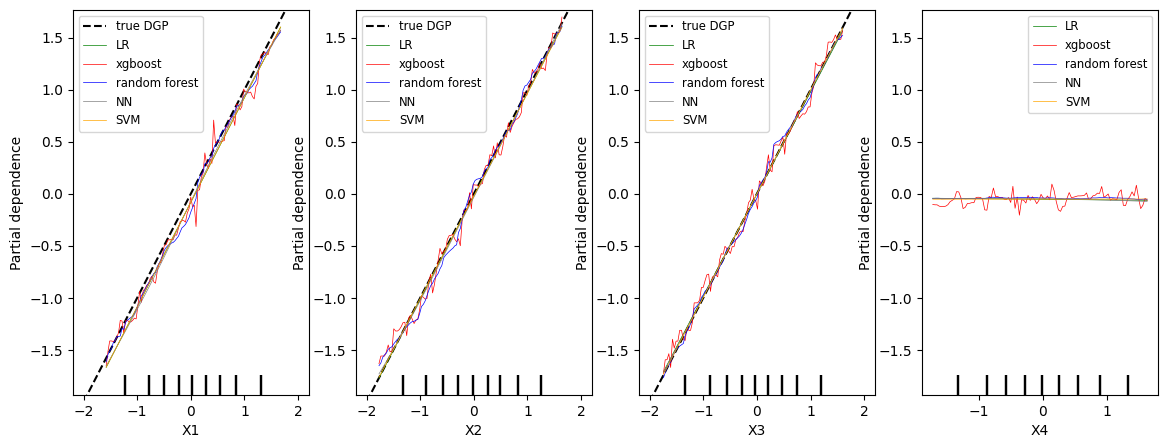

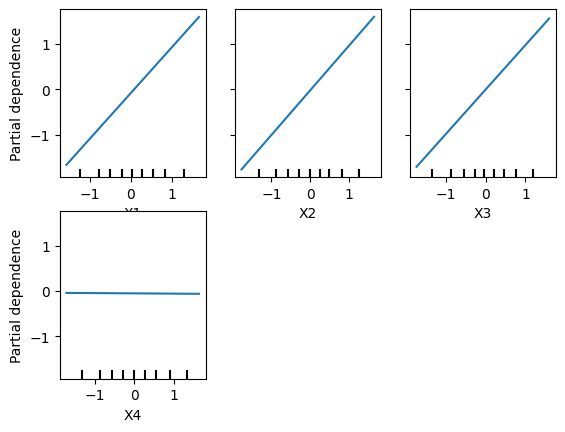

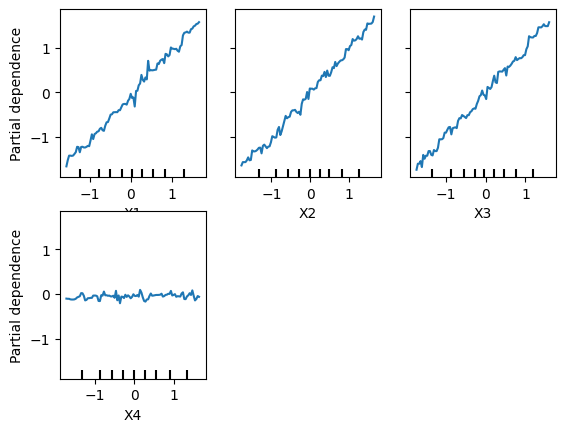

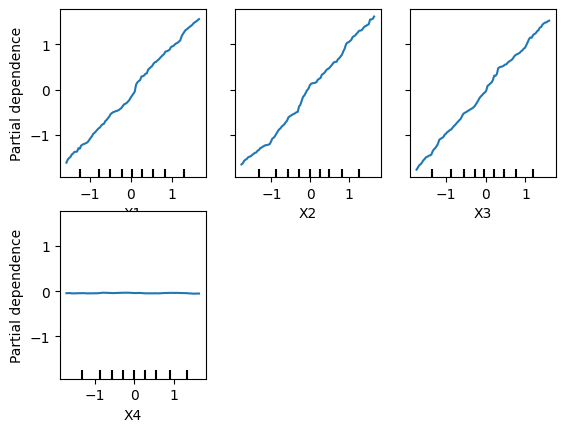

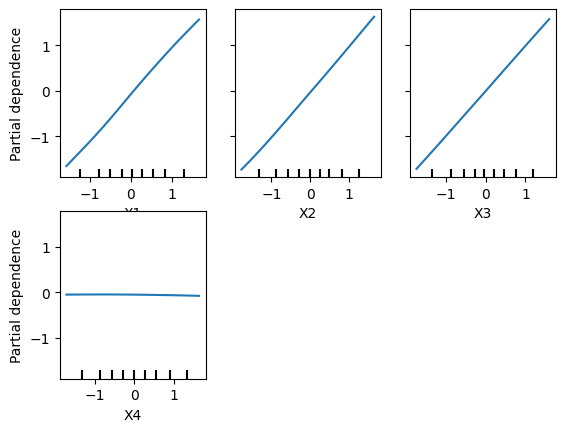

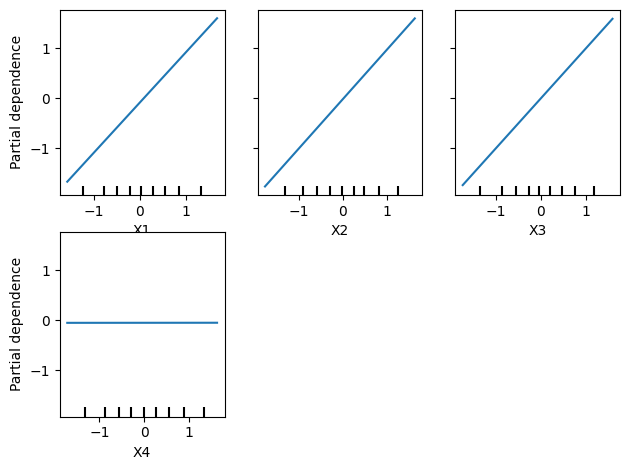

In [98]:
from sklearn.inspection import PartialDependenceDisplay


# First subplot with two lines for sine waves
v


base case  : PDP can capture real relation of each feature in the dataset because they are independent.
random forest and XGB seems to be more sensetive to the nois in the data


Simulation 2 : correlated features

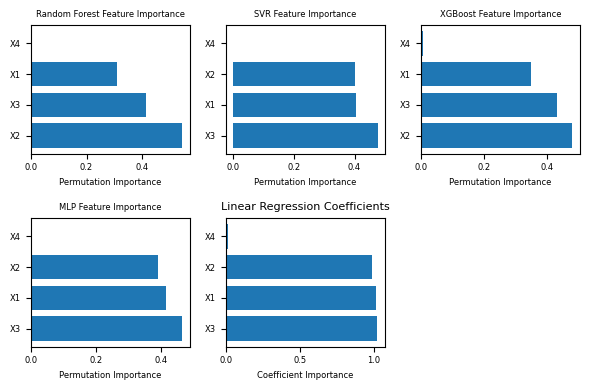

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Generating synthetic regression data with 3 separate features and noise
np.random.seed(42)
num_samples = 1000

# Generating correlated features (X1 and X2)
mean = [0, 0]
cov = [[1, 0.91], [0.91, 1]]  # Covariance matrix for X1 and X2 with correlation 0.9
X1_X2 = np.random.multivariate_normal(mean, cov, num_samples)
X1 = X1_X2[:, 0]
X2 = X1_X2[:, 1]

# Generating the third independent feature (X3)
X3 = np.random.randn(num_samples)
X4 = np.random.randn(num_samples)


# Target variable (y) as the sum of features plus noise
noise = np.random.normal(0, 0.5, num_samples)  # Adding noise
y = X1 + X2 + X3 +  noise

data = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4,'y': y})

# Features and Target
X = data[['X1', 'X2', 'X3', 'X4']]
y = data['y']

# Splitting the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Splitting the dataset into training and testing sets

# Fitting different regression models
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Support Vector Machine Regression
svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train, y_train)

# XGBoost Regression
xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)
mlp_reg = MLPRegressor(hidden_layer_sizes=50,max_iter=1000)
mlp_reg.fit(X_train, y_train)
# Evaluate models
data = pd.DataFrame({"X1":X1,"X2":X2,"X3":X3,"X4":X4,"y":y})
# Dictionary to store feature importance results
fi_results = {}

# RandomForestRegressor
rf_fi = permutation_importance(rf_reg, X_test, y_test, n_repeats=30, random_state=42)
fi_results['Random Forest'] = rf_fi.importances_mean

# SVR
svm_fi = permutation_importance(svm_reg, X_test, y_test, n_repeats=30, random_state=42)
fi_results['SVR'] = svm_fi.importances_mean

# XGBRegressor
xgb_fi = permutation_importance(xgb_reg, X_test, y_test, n_repeats=30, random_state=42)
fi_results['XGBoost'] = xgb_fi.importances_mean

# MLPRegressor
mlp_fi = permutation_importance(mlp_reg, X_test, y_test, n_repeats=30, random_state=42)
fi_results['MLP'] = mlp_fi.importances_mean

fi_results['Linear Regression'] = np.abs(linear_reg.coef_)
# Plotting feature importances for each model
plt.figure(figsize=(6, 4))

for i, (model, fi) in enumerate(fi_results.items(), 1):
    plt.subplot(2, 3, i)
    if model != 'Linear Regression':
        fi = fi_results[model]
        sorted_idx = np.argsort(fi)[::-1]
        plt.barh(range(X.shape[1]), fi[sorted_idx], align='center')
        plt.yticks(range(X.shape[1]), X.columns[sorted_idx], fontsize=6)  # Adjust font size for y-ticks
        plt.xlabel('Permutation Importance', fontsize=6)  # Adjust font size for x-label
        plt.title(f'{model} Feature Importance', fontsize=6)  # Adjust font size for title
    else:
        fi = fi_results[model]
        sorted_idx = np.argsort(fi)[::-1]
        plt.barh(range(X.shape[1]), fi[sorted_idx], align='center')
        plt.yticks(range(X.shape[1]), X.columns[sorted_idx], fontsize=6)  # Adjust font size for y-ticks
        plt.xlabel('Coefficient Importance', fontsize=6)  # Adjust font size for x-label
        plt.title(f'{model} Coefficients', fontsize=8)  # Adjust font size for title
    plt.xticks(fontsize=6)
plt.tight_layout()
plt.show()


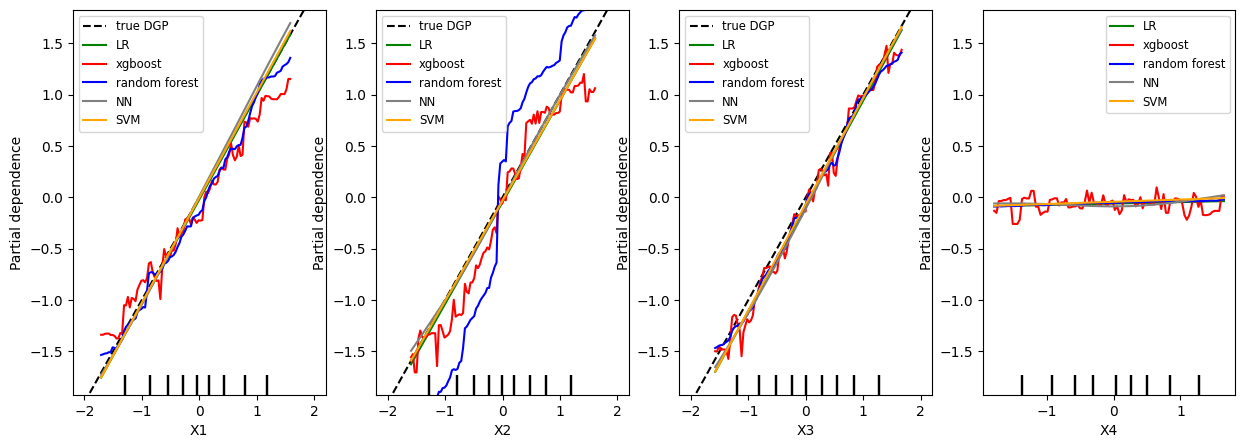

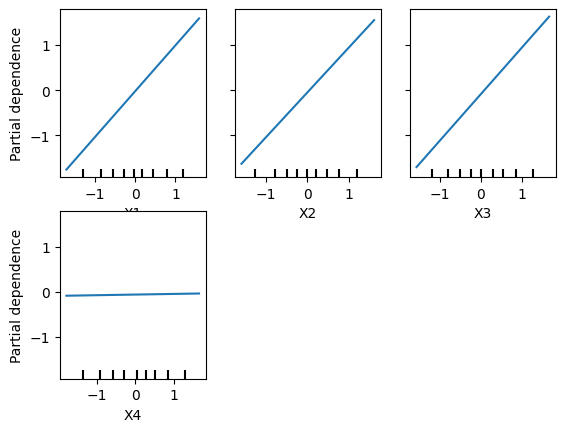

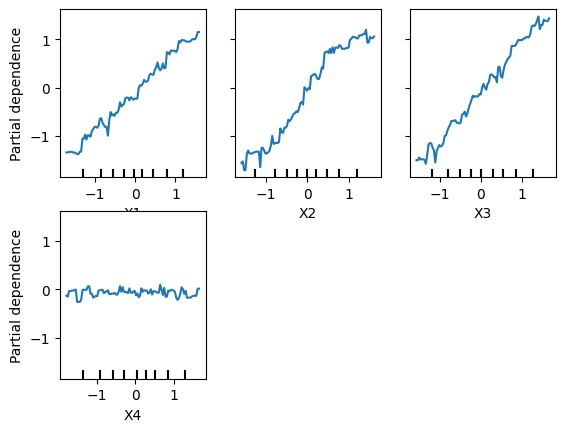

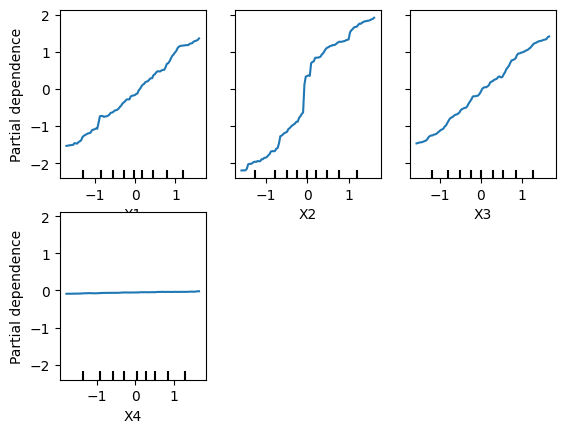

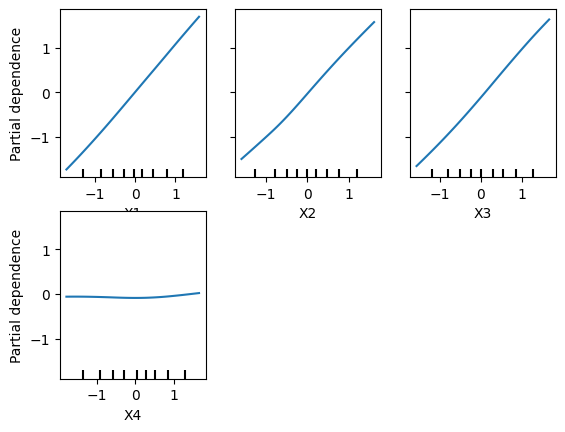

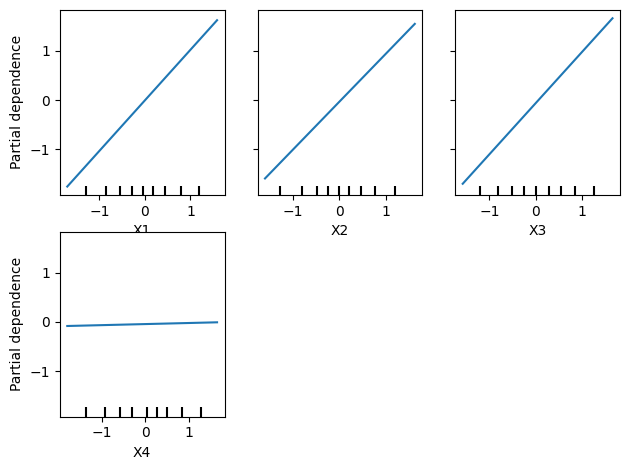

In [21]:
from sklearn.inspection import PartialDependenceDisplay

fig,(ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(15, 5))  # (rows, columns, index)
lr_disp = PartialDependenceDisplay.from_estimator(linear_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
xgb_disp = PartialDependenceDisplay.from_estimator(xgb_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
rf_disp = PartialDependenceDisplay.from_estimator(rf_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
mlrp_disp = PartialDependenceDisplay.from_estimator(mlp_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
svm_disp = PartialDependenceDisplay.from_estimator(svm_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
x_vals = np.linspace(-2, 2, 1000)
ax1.plot(x_vals, x_vals, label='true DGP', color='black',linestyle='dashed')
ax2.plot(x_vals, x_vals, label='true DGP', color='black',linestyle='dashed')
ax3.plot(x_vals, x_vals, label='true DGP', color='black',linestyle='dashed')
lr_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "LR","color":'green'})
xgb_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "xgboost","color":'red'})
rf_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "random forest","color":'blue'})
mlrp_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "NN","color":'grey'})
svm_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "SVM","color":'orange'})
ax1.legend(fontsize='small')  
ax2.legend(fontsize='small')
ax3.legend(fontsize='small')
ax4.legend(fontsize='small')
plt.tight_layout()
plt.show()


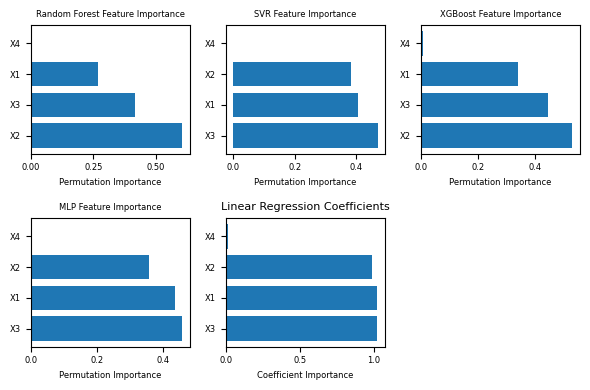

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Generating synthetic regression data with 3 separate features and noise
np.random.seed(42)
num_samples = 1000

# Generating correlated features (X1 and X2)
mean = [0, 0]
cov = [[1, 0.95], [0.95, 1]]  # Covariance matrix for X1 and X2 with correlation 0.9
X1_X2 = np.random.multivariate_normal(mean, cov, num_samples)
X1 = X1_X2[:, 0]
X2 = X1_X2[:, 1]

# Generating the third independent feature (X3)
X3 = np.random.randn(num_samples)
X4 = np.random.randn(num_samples)


# Target variable (y) as the sum of features plus noise
noise = np.random.normal(0, 0.5, num_samples)  # Adding noise
y = X1 + X2 + X3 +  noise

data = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4,'y': y})

# Features and Target
X = data[['X1', 'X2', 'X3', 'X4']]
y = data['y']

# Splitting the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Splitting the dataset into training and testing sets

# Fitting different regression models
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Support Vector Machine Regression
svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train, y_train)

# XGBoost Regression
xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)
mlp_reg = MLPRegressor(hidden_layer_sizes=50,max_iter=1000)
mlp_reg.fit(X_train, y_train)
# Evaluate models
data = pd.DataFrame({"X1":X1,"X2":X2,"X3":X3,"X4":X4,"y":y})
# Dictionary to store feature importance results
fi_results = {}

# RandomForestRegressor
rf_fi = permutation_importance(rf_reg, X_test, y_test, n_repeats=30, random_state=42)
fi_results['Random Forest'] = rf_fi.importances_mean

# SVR
svm_fi = permutation_importance(svm_reg, X_test, y_test, n_repeats=30, random_state=42)
fi_results['SVR'] = svm_fi.importances_mean

# XGBRegressor
xgb_fi = permutation_importance(xgb_reg, X_test, y_test, n_repeats=30, random_state=42)
fi_results['XGBoost'] = xgb_fi.importances_mean

# MLPRegressor
mlp_fi = permutation_importance(mlp_reg, X_test, y_test, n_repeats=30, random_state=42)
fi_results['MLP'] = mlp_fi.importances_mean

fi_results['Linear Regression'] = np.abs(linear_reg.coef_)
# Plotting feature importances for each model
plt.figure(figsize=(6, 4))

for i, (model, fi) in enumerate(fi_results.items(), 1):
    plt.subplot(2, 3, i)
    if model != 'Linear Regression':
        fi = fi_results[model]
        sorted_idx = np.argsort(fi)[::-1]
        plt.barh(range(X.shape[1]), fi[sorted_idx], align='center')
        plt.yticks(range(X.shape[1]), X.columns[sorted_idx], fontsize=6)  # Adjust font size for y-ticks
        plt.xlabel('Permutation Importance', fontsize=6)  # Adjust font size for x-label
        plt.title(f'{model} Feature Importance', fontsize=6)  # Adjust font size for title
    else:
        fi = fi_results[model]
        sorted_idx = np.argsort(fi)[::-1]
        plt.barh(range(X.shape[1]), fi[sorted_idx], align='center')
        plt.yticks(range(X.shape[1]), X.columns[sorted_idx], fontsize=6)  # Adjust font size for y-ticks
        plt.xlabel('Coefficient Importance', fontsize=6)  # Adjust font size for x-label
        plt.title(f'{model} Coefficients', fontsize=8)  # Adjust font size for title
    plt.xticks(fontsize=6)
plt.tight_layout()
plt.show()


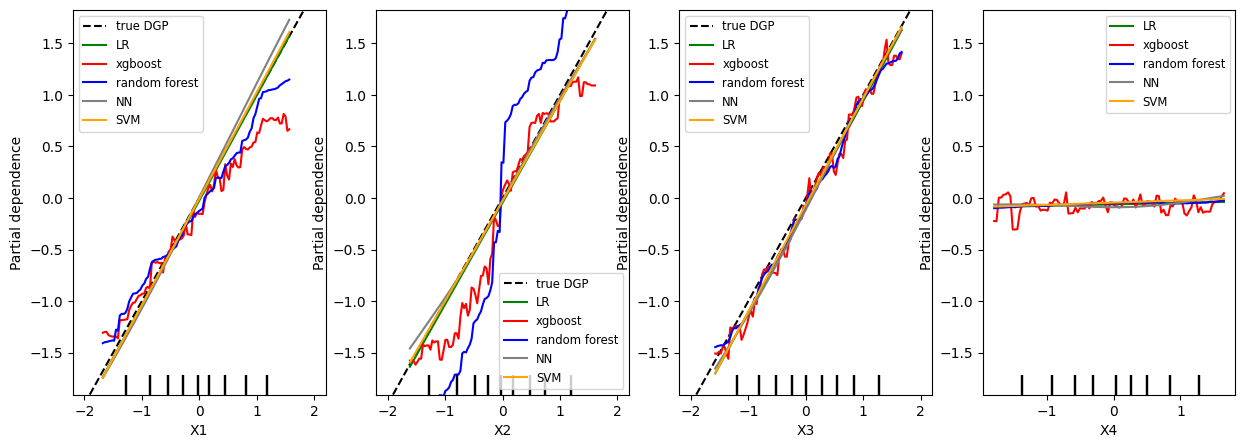

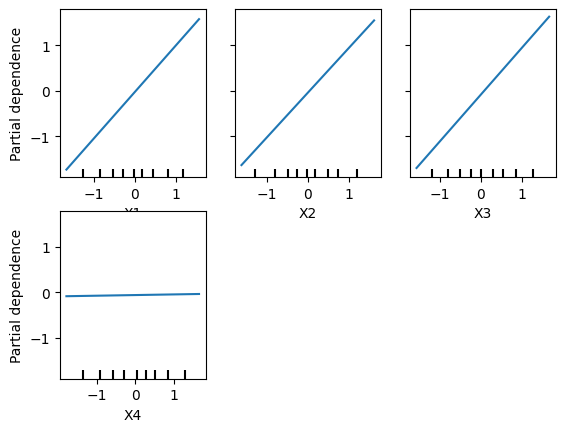

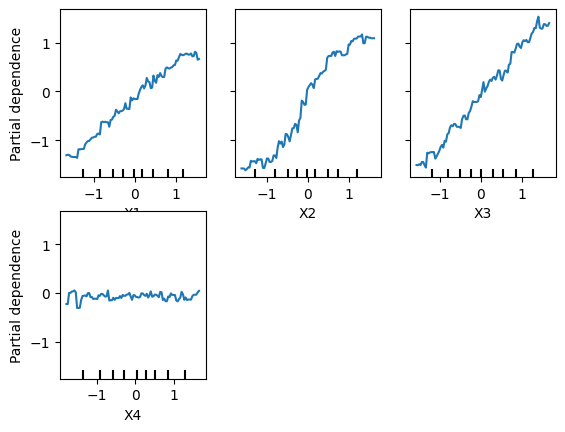

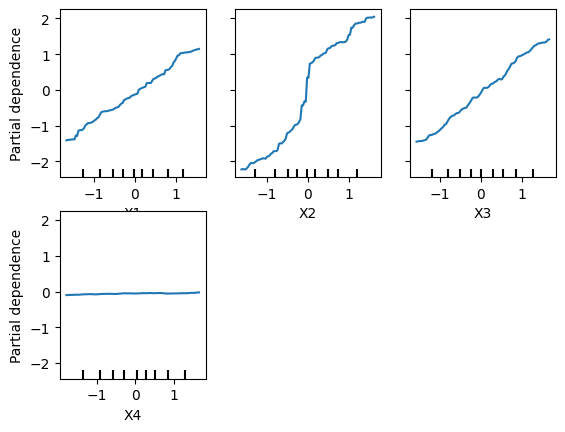

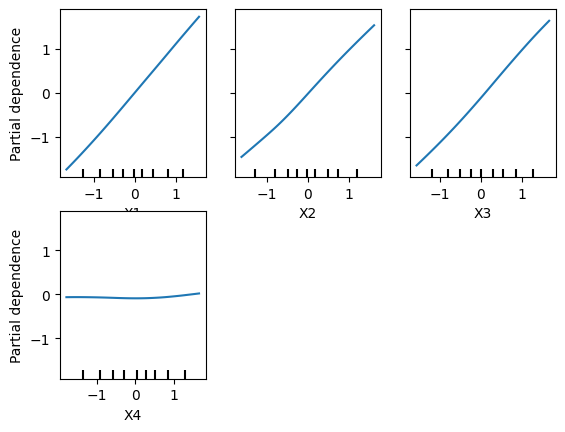

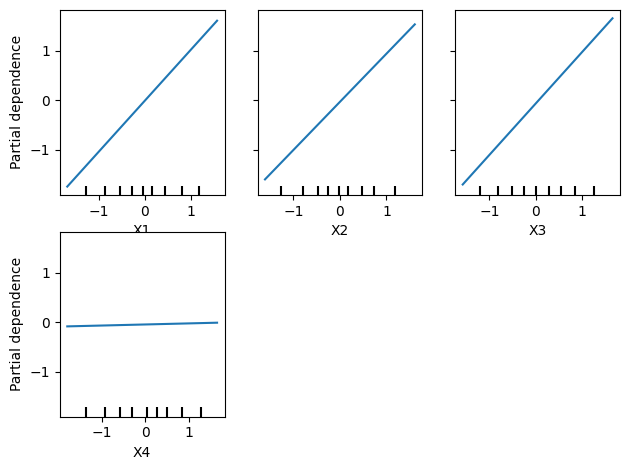

In [23]:
from sklearn.inspection import PartialDependenceDisplay

fig,(ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(15, 5))  # (rows, columns, index)
lr_disp = PartialDependenceDisplay.from_estimator(linear_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
xgb_disp = PartialDependenceDisplay.from_estimator(xgb_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
rf_disp = PartialDependenceDisplay.from_estimator(rf_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
mlrp_disp = PartialDependenceDisplay.from_estimator(mlp_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
svm_disp = PartialDependenceDisplay.from_estimator(svm_reg, X_train, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
x_vals = np.linspace(-2, 2, 1000)
ax1.plot(x_vals, x_vals, label='true DGP', color='black',linestyle='dashed')
ax2.plot(x_vals, x_vals, label='true DGP', color='black',linestyle='dashed')
ax3.plot(x_vals, x_vals, label='true DGP', color='black',linestyle='dashed')
lr_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "LR","color":'green'})
xgb_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "xgboost","color":'red'})
rf_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "random forest","color":'blue'})
mlrp_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "NN","color":'grey'})
svm_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "SVM","color":'orange'})
ax1.legend(fontsize='small')  
ax2.legend(fontsize='small')
ax3.legend(fontsize='small')
ax4.legend(fontsize='small')
plt.tight_layout()
plt.show()

case 2 : in presence of correlate feature in linear regression and dnn show more smooth shape for the correlated feature 
In simulated experiments where linear correlations exist among features, the performance divergence between tree-based models like Random Forests (RF) and XGBoost (XGB) versus Multilayer Perceptrons (MLPs) can be delineated by their aptitude in capturing linear relationships.

In scenarios where the relationship among features follows a linear pattern (e.g., X1 + X2 + X3 + noise), tree-based models such as RF and XGB outperform MLPs due to their inherent capacity to discern and utilize linear correlations. These models leverage decision trees to partition the feature space, effectively capturing linear relationships among correlated features. Consequently, when confronted with correlated features like X1, X2, and X3, tree-based models construct splits that correspond to these correlations, enabling the approximation of linear relationships within the data.

Conversely, MLPs, characterized by their neural network architecture, are more inclined to learn complex and non-linear patterns. In scenarios with linear correlations, MLPs might represent these relationships in higher-level abstractions, resulting in smoother Partial Dependence Plots (PDPs) for correlated features. This smoothness might indicate the model's abstraction of linear relationships rather than explicit capture, leading to a perception of reduced fidelity in depicting linear correlations compared to tree-based models.

However, it's important to consider that while tree-based models excel in capturing linear relations, they may lack the capability to represent intricate non-linear patterns. MLPs, with their ability to capture complex relationships, might offer better representation of non-linear structures but potentially display smoother PDPs for linear correlations.

Simulation 3 : dependent features

In [46]:
import matplotlib.pylab as plt
from sklearn.inspection import PartialDependenceDisplay
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Set seed for reproducibility
np.random.seed(42)

# Generating random values for x1, x2, and x3 where x3 is between -1 and 1
x1 = np.random.uniform(-1, 1, 1000)
x2 = np.random.uniform(-1, 1, 1000)
x3 = np.random.uniform(-1, 1, 1000)
x4 = np.random.uniform(-1, 1, 1000)


# Generating random values for the error term e from a normal distribution
e = np.random.normal(0, 1, 1000)

# Calculate y based on the equation with x3 values above 0
condition = x3 > 0
y = 0.2 * x1 - 5 * x2 + np.where(condition, 10 * x2, 0) + e

# Reshape x2 for sklearn's input requirement
X = np.column_stack((x1, x2,x3,x4))

# Initialize and fit the models
linear_model = LinearRegression()
linear_model.fit(X, y)

xgb_model = XGBRegressor()
xgb_model.fit(X, y)

svm_model = SVR(kernel='rbf')
svm_model.fit(X, y)

rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X, y)

# Predict y values using the fitted models
y_pred_linear = linear_model.predict(X)
y_pred_xgb = xgb_model.predict(X)
y_pred_svm = svm_model.predict(X)
y_pred_rf = rf_model.predict(X)



<Figure size 2000x400 with 0 Axes>

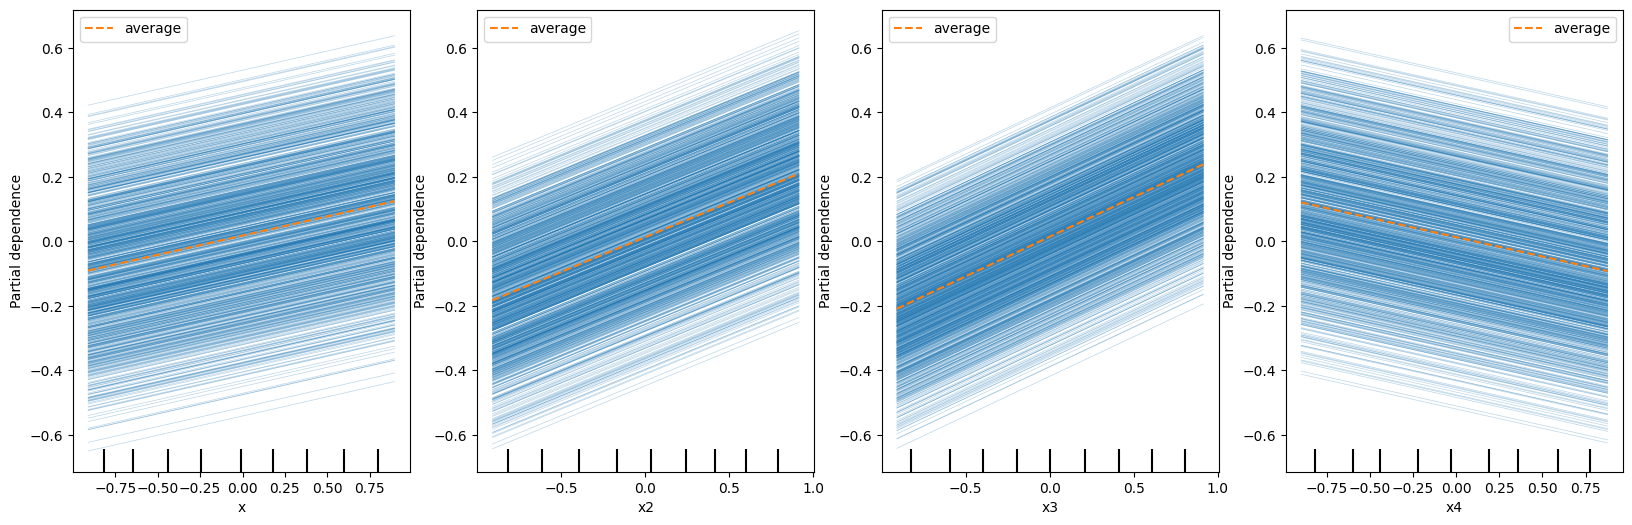

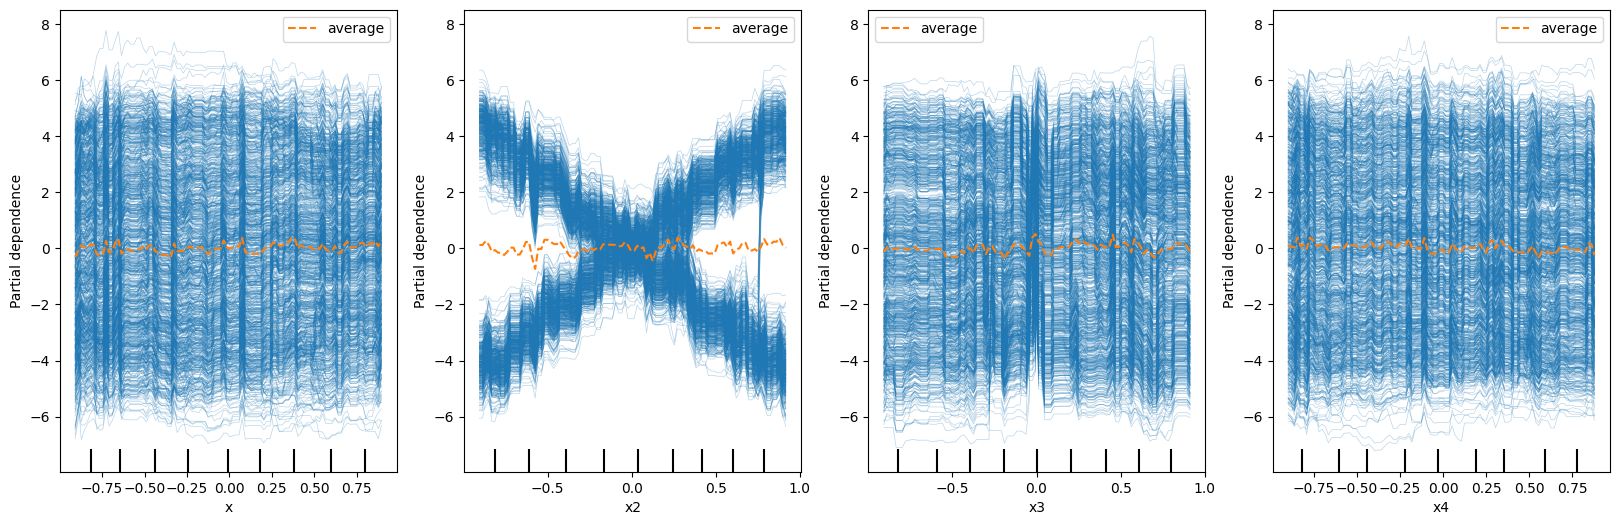

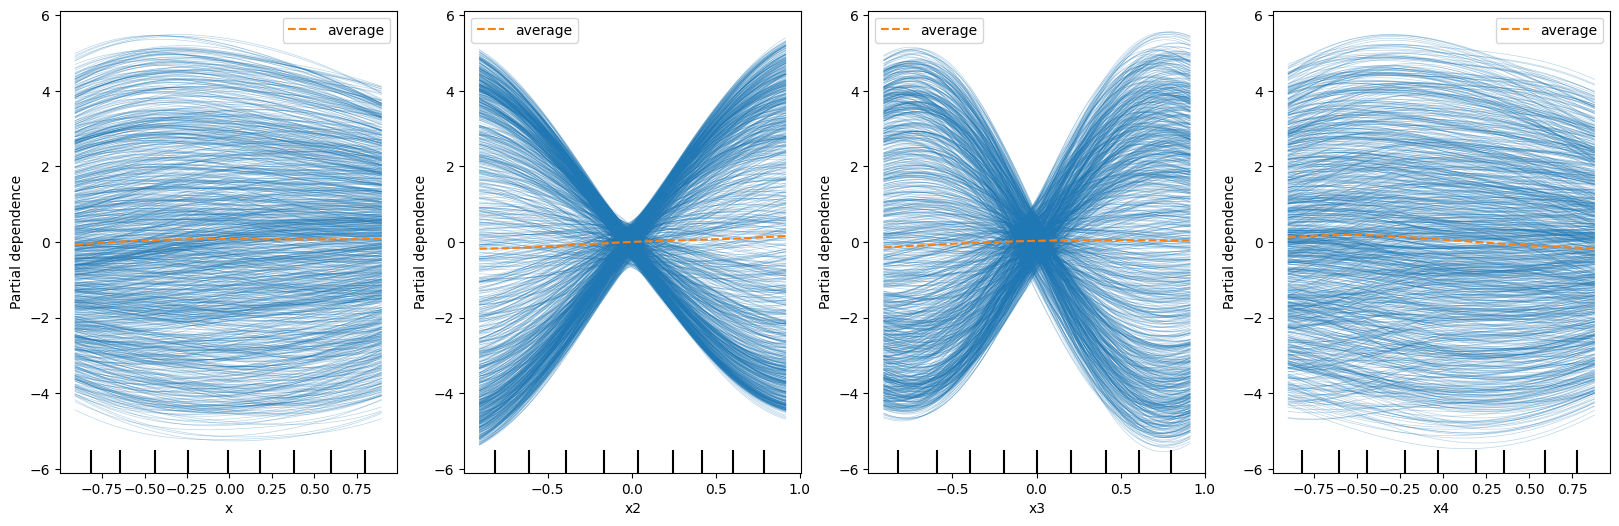

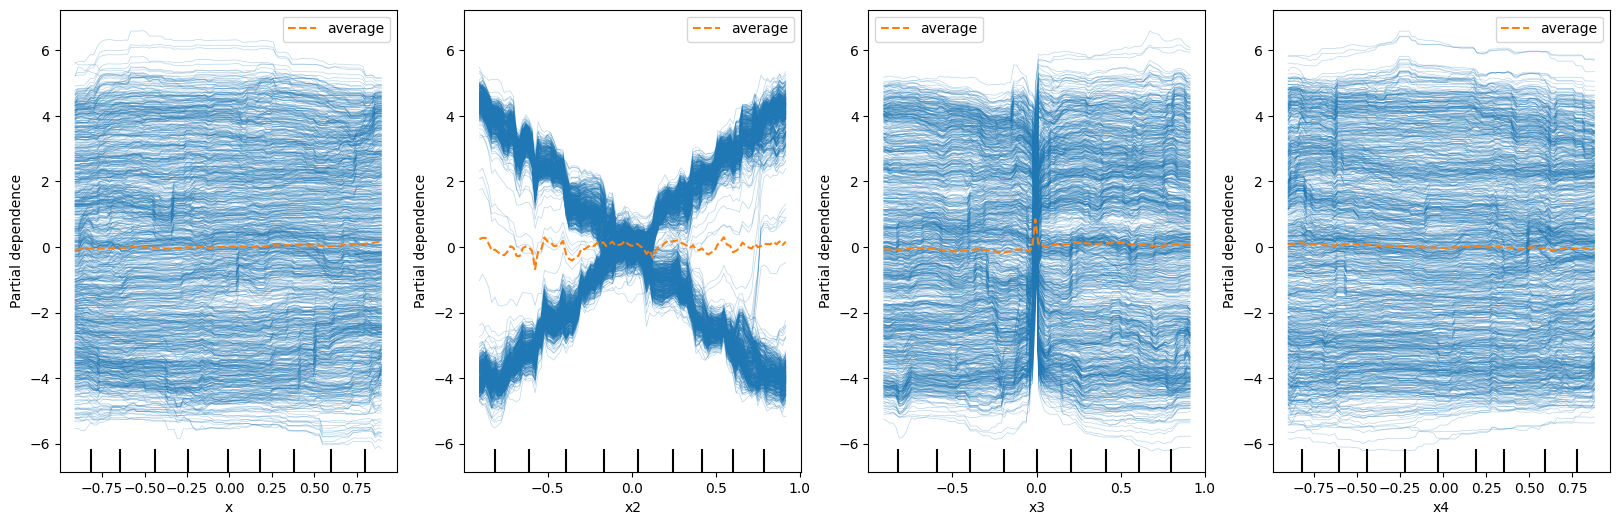

In [47]:
plt.figure(figsize=(20, 4))  # Adjust the figure size as needed
# First subplot with two lines for sine waves
fig, (ax1, ax2,ax3,ax4) = plt.subplots(
    1, 4, figsize=(20, 6))  # (rows, columns, index)
PartialDependenceDisplay.from_estimator(linear_model, X, features=[
                                               0, 1,2,3], feature_names=["x", "x2","x3","x4"], ax=[ax1, ax2,ax3,ax4],kind='both')
fig, (ax1, ax2,ax3,ax4) = plt.subplots(
    1, 4, figsize=(20, 6))  # (rows, columns, index)
PartialDependenceDisplay.from_estimator(xgb_model, X, features=[
                                               0, 1,2,3], feature_names=["x", "x2","x3","x4"], ax=[ax1, ax2,ax3,ax4],kind='both')
fig, (ax1, ax2,ax3,ax4) = plt.subplots(
    1, 4, figsize=(20, 6))  # (rows, columns, index)
PartialDependenceDisplay.from_estimator(svm_model, X, features=[
                                               0, 1,2,3], feature_names=["x", "x2","x3","x4"], ax=[ax1, ax2,ax3,ax4],kind='both')
fig, (ax1, ax2,ax3,ax4) = plt.subplots(
    1, 4, figsize=(20, 6))  # (rows, columns, index)
PartialDependenceDisplay.from_estimator(rf_model, X, features=[
                                               0, 1,2,3], feature_names=["x", "x2","x3","x4"], ax=[ax1, ax2,ax3,ax4],kind='both')


In [50]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
import pandas as pd
from dython.nominal import associations  # correlation calculation

# Generating synthetic regression data with dependent features and noise
np.random.seed(42)
num_samples = 1500

X1 = np.random.randn(num_samples)
X2 = X1.copy()
X3 = np.random.randn(num_samples)

X4 = np.random.randn(num_samples)

noise = np.random.normal(0, 0.5, num_samples)  # Adding noise


y = X1 + X2 + X3 + noise

# Reshape features to a 2D array
X = np.vstack((X1, X2, X3,X4)).T



# Fitting different regression models
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X, y)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X, y)

# Support Vector Machine Regression
svm_reg = SVR(kernel='linear')
svm_reg.fit(X, y)

# XGBoost Regression
xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X, y)
mlpr_model = MLPRegressor(hidden_layer_sizes=50,max_iter=1000)
mlpr_model.fit(X, y)



MLPRegressor(hidden_layer_sizes=50, max_iter=1000)

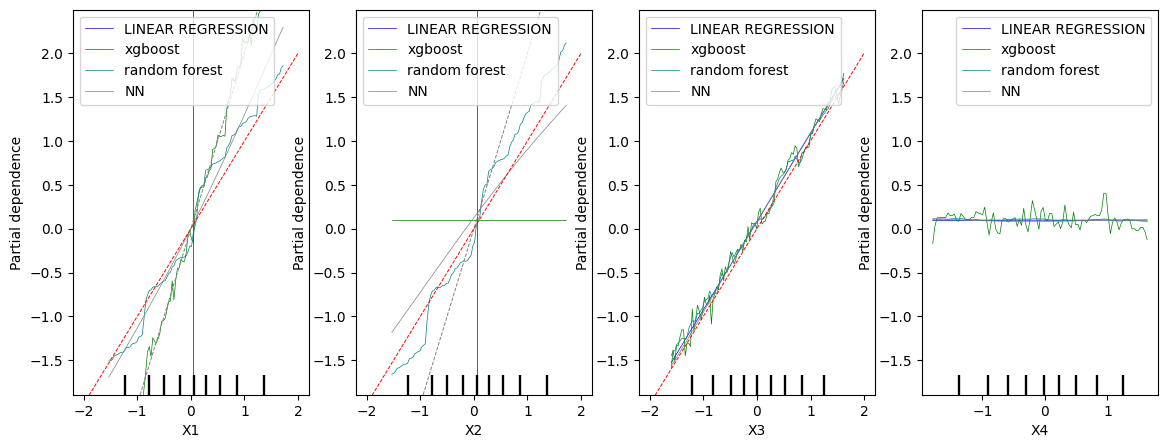

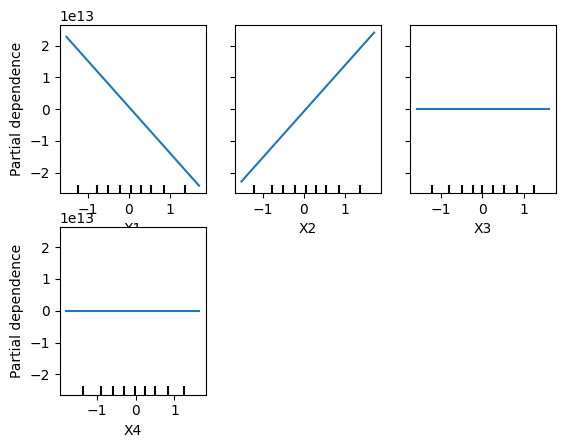

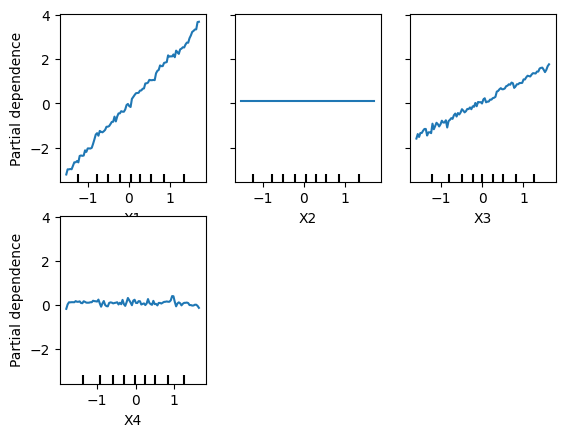

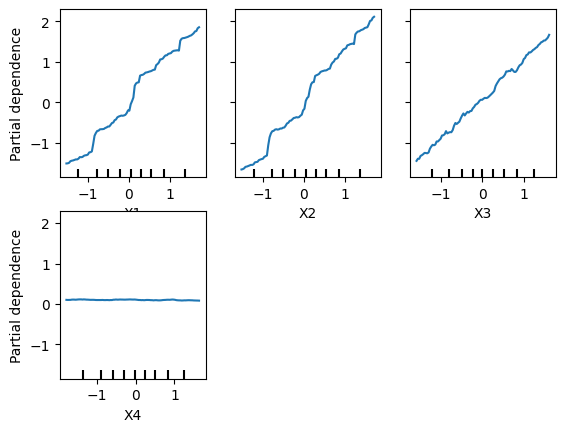

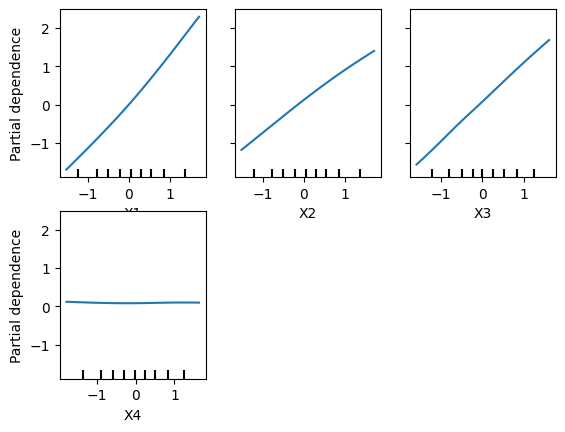

In [53]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pylab as plt
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(14, 5))  # (rows, columns, index)
lr_disp = PartialDependenceDisplay.from_estimator(linear_reg, X, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
xgb_disp = PartialDependenceDisplay.from_estimator(xgb_reg, X, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
rf_disp = PartialDependenceDisplay.from_estimator(rf_reg, X, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])
mlrp_disp = PartialDependenceDisplay.from_estimator(mlpr_model, X, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"])

lr_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "LINEAR REGRESSION","color":'blue',"linewidth":0.5})
xgb_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "xgboost","color":'green',"linewidth":0.5})
rf_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "random forest","color":'teal',"linewidth":0.5})
mlrp_disp.plot(ax=[ax1, ax2,ax3,ax4], line_kw={"label": "NN","color":'grey',"linewidth":0.5})
x_vals = np.linspace(-2, 2, 1000)
ax1.plot(x_vals, x_vals, label='X1',color='red', linestyle='dashed',linewidth=0.7)
ax1.plot(x_vals, x_vals + x_vals, label='X1',color='grey', linestyle='dashed',linewidth=0.7)
ax2.plot(x_vals, x_vals + x_vals , label='X1',color='grey', linestyle='dashed',linewidth=0.7)
ax2.plot(x_vals, x_vals, label='X1',color='red', linestyle='dashed',linewidth=0.7)
ax3.plot(x_vals, x_vals, label='X1',color='red', linestyle='dashed',linewidth=0.7)




Simulation 4 : outliers effect

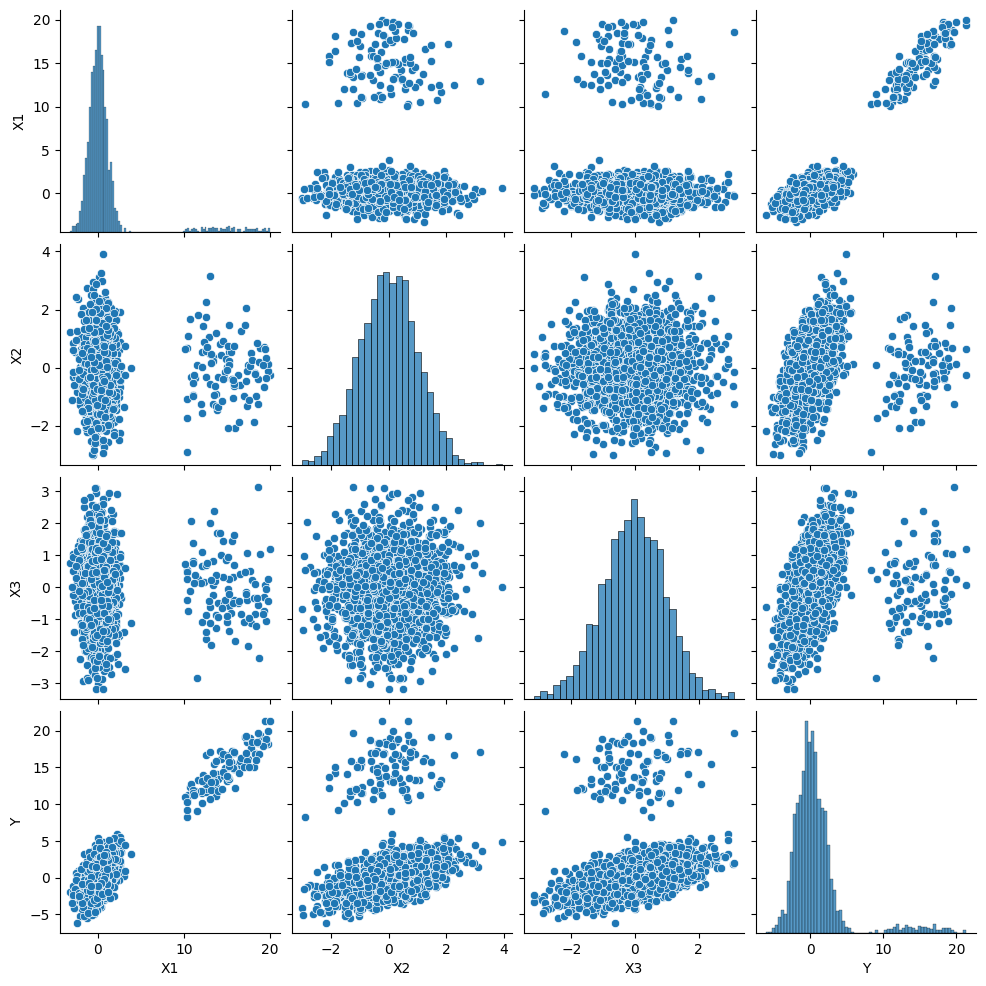

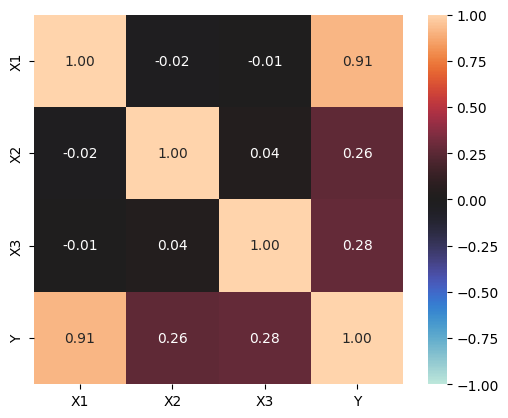

Linear Regression R^2 Score: 0.9763667750233229
Random Forest Regression R^2 Score: 0.9643724225951524
SVM Regression R^2 Score: 0.9763298267562336
XGBoost Regression R^2 Score: 0.9592177646594107


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Generating synthetic regression data with 3 features and outliers
np.random.seed(42)
num_samples = 2000

# Generating features X1, X2, and X3
X1 = np.random.randn(num_samples)
X2 = np.random.randn(num_samples)
X3 = np.random.randn(num_samples)

# Introducing outliers in X1 (replace 20 samples with outliers)
num_outliers = 100
outliers_indices = np.random.choice(num_samples, num_outliers, replace=False)
X1[outliers_indices] = np.random.uniform(10, 20, num_outliers)  # Assigning outliers to X1

# Target variable (y) as the sum of features plus noise
noise = np.random.normal(0, 0.5, num_samples)  # Adding noise
y = X1 + X2 + X3 + noise

# Reshape features to a 2D array
X = np.vstack((X1, X2, X3)).T

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting different regression models
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Support Vector Machine Regression
svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train, y_train)

# XGBoost Regression
xgb_reg = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_reg.fit(X_train, y_train)

# Evaluate models
linear_reg_score = linear_reg.score(X_test, y_test)
rf_reg_score = rf_reg.score(X_test, y_test)
svm_reg_score = svm_reg.score(X_test, y_test)
xgb_reg_score = xgb_reg.score(X_test, y_test)

data = pd.DataFrame({"X1":X1,"X2":X2,"X3":X3,"Y":y})
sns.pairplot(data)
associations(data)
print(f"Linear Regression R^2 Score: {linear_reg_score}")
print(f"Random Forest Regression R^2 Score: {rf_reg_score}")
print(f"SVM Regression R^2 Score: {svm_reg_score}")
print(f"XGBoost Regression R^2 Score: {xgb_reg_score}")


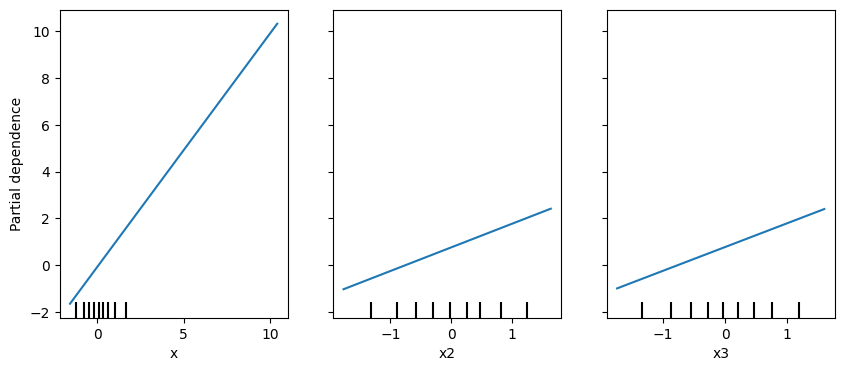

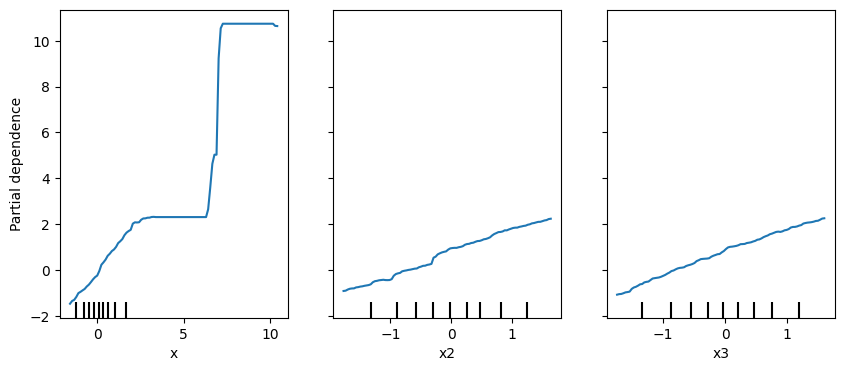

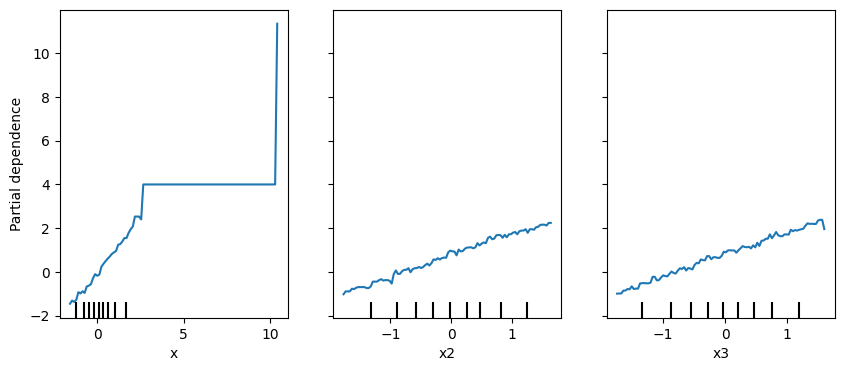

In [ ]:
from sklearn.inspection import PartialDependenceDisplay


plt.figure(figsize=(10, 4))  # Adjust the figure size as needed

# First subplot with two lines for sine waves
ax = plt.subplot(1, 1, 1)  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(linear_reg, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=ax,grid_resolution=200)

plt.figure(figsize=(10, 4))  # Adjust the figure size as needed

# First subplot with two lines for sine waves
ax = plt.subplot(1, 1, 1)  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(rf_reg, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=ax)
plt.figure(figsize=(10, 4))  # Adjust the figure size as needed

# First subplot with two lines for sine waves
ax = plt.subplot(1, 1, 1)  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(xgb_reg, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=ax)

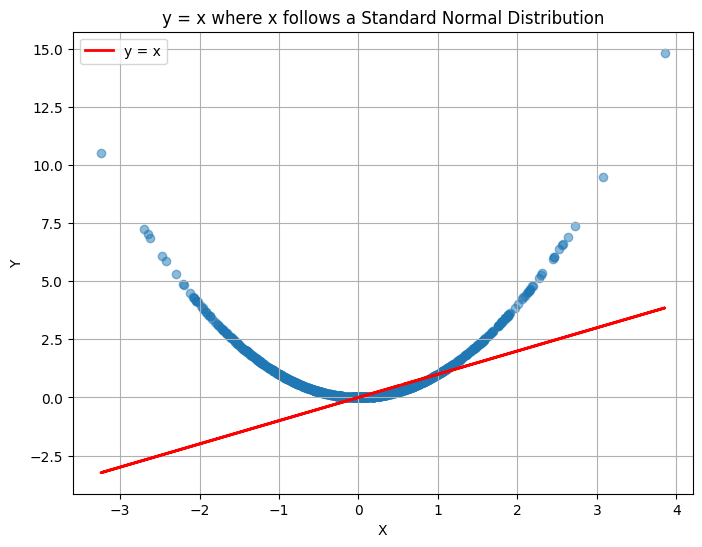

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generating data where y = x and x follows a standard normal distribution
np.random.seed(42)
x = np.random.randn(1000)  # Generating 1000 random values for x following a standard normal distribution
y = x**2  # y is directly proportional to x

# Creating a scatter plot of y against x
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.plot(x, x, color='red', label='y = x', linewidth=2)  # Plotting the line y = x
plt.title('y = x where x follows a Standard Normal Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


Simulation 5 : non linear features

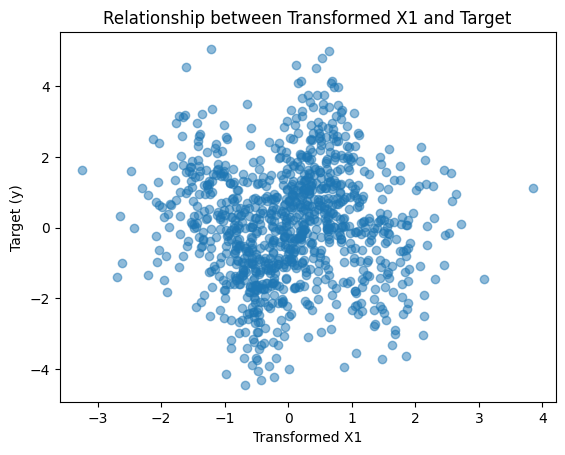

C:\Users\versu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


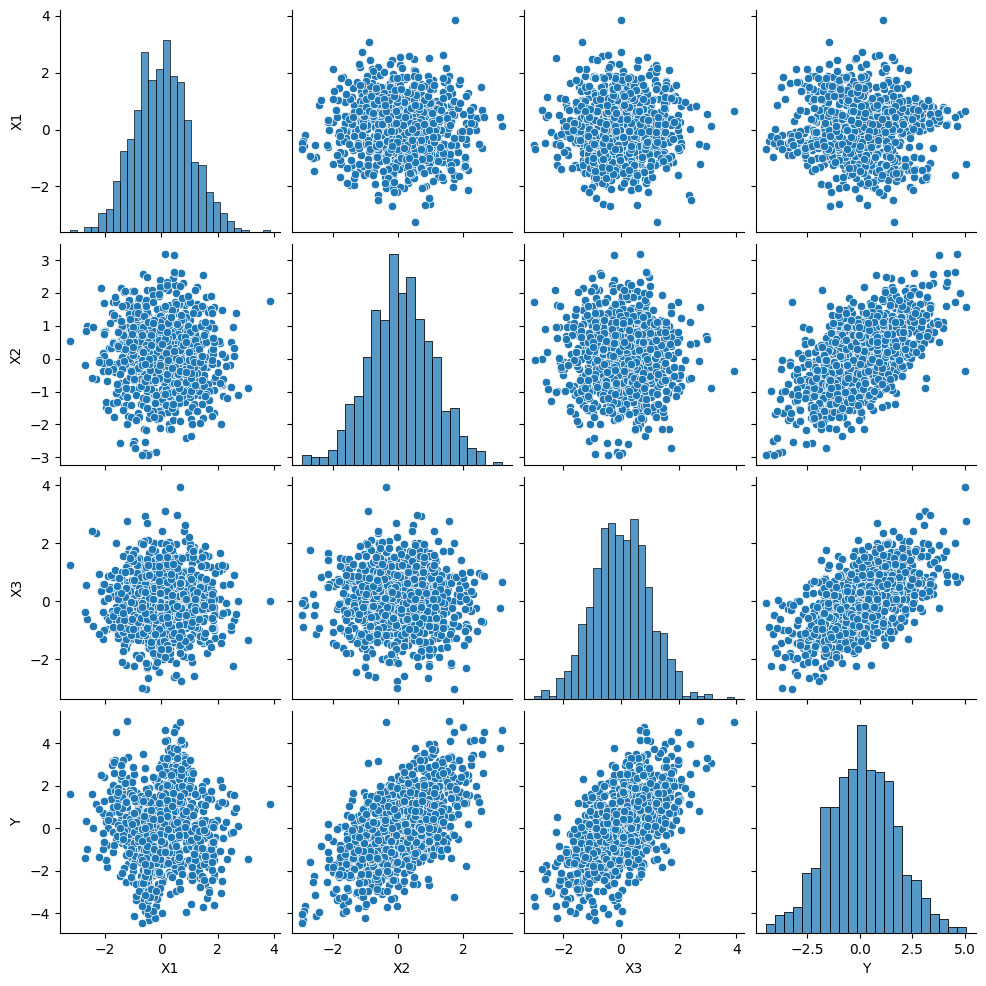

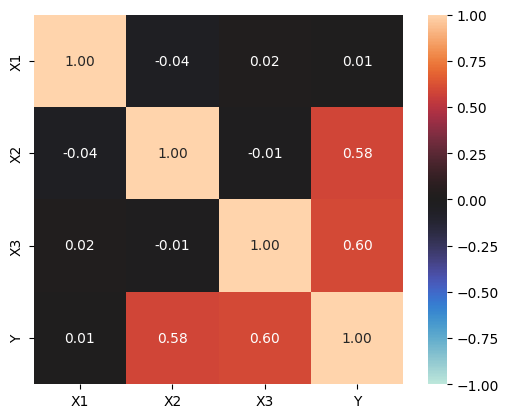

Linear Regression R^2 Score: 0.7041444356382874
Random Forest Regression R^2 Score: 0.8263378238797248
SVM Regression R^2 Score: 0.8138715650426702
XGBoost Regression R^2 Score: 0.8200948249011768


In [61]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

# Generating synthetic regression data with 3 features and non-linearity in X1
np.random.seed(42)
num_samples = 1000

# Generating features X1, X2, and X3
X1 = np.random.randn(num_samples)
X2 = np.random.randn(num_samples)
X3 = np.random.randn(num_samples)

# Introducing non-linearity in X1 (squaring X1)
X1_t = np.sin(3*X1)

# Target variable (y) as the sum of features plus noise
noise = np.random.normal(0, 0.5, num_samples)  # Adding noise
y = X1_t + X2 + X3 + noise

# Reshape features to a 2D array
X = np.vstack((X1, X2, X3)).T
# Plotting X1_transformed against y
plt.scatter(X1, y, alpha=0.5)
plt.xlabel('Transformed X1')
plt.ylabel('Target (y)')
plt.title('Relationship between Transformed X1 and Target')
plt.show()

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting different regression models
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Support Vector Machine Regression
svm_reg = SVR(kernel='rbf')
svm_reg.fit(X_train, y_train)

# XGBoost Regression
xgb_reg = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_reg.fit(X_train, y_train)

# XGBoost Regression
mlpr_model = MLPRegressor(hidden_layer_sizes=50,max_iter=1000)
mlpr_model.fit(X_train, y_train)
# Evaluate models
linear_reg_score = linear_reg.score(X_test, y_test)
rf_reg_score = rf_reg.score(X_test, y_test)
svm_reg_score = svm_reg.score(X_test, y_test)
xgb_reg_score = xgb_reg.score(X_test, y_test)
data = pd.DataFrame({"X1":X1,"X2":X2,"X3":X3,"Y":y})
sns.pairplot(data)
associations(data)
print(f"Linear Regression R^2 Score: {linear_reg_score}")
print(f"Random Forest Regression R^2 Score: {rf_reg_score}")
print(f"SVM Regression R^2 Score: {svm_reg_score}")
print(f"XGBoost Regression R^2 Score: {xgb_reg_score}")


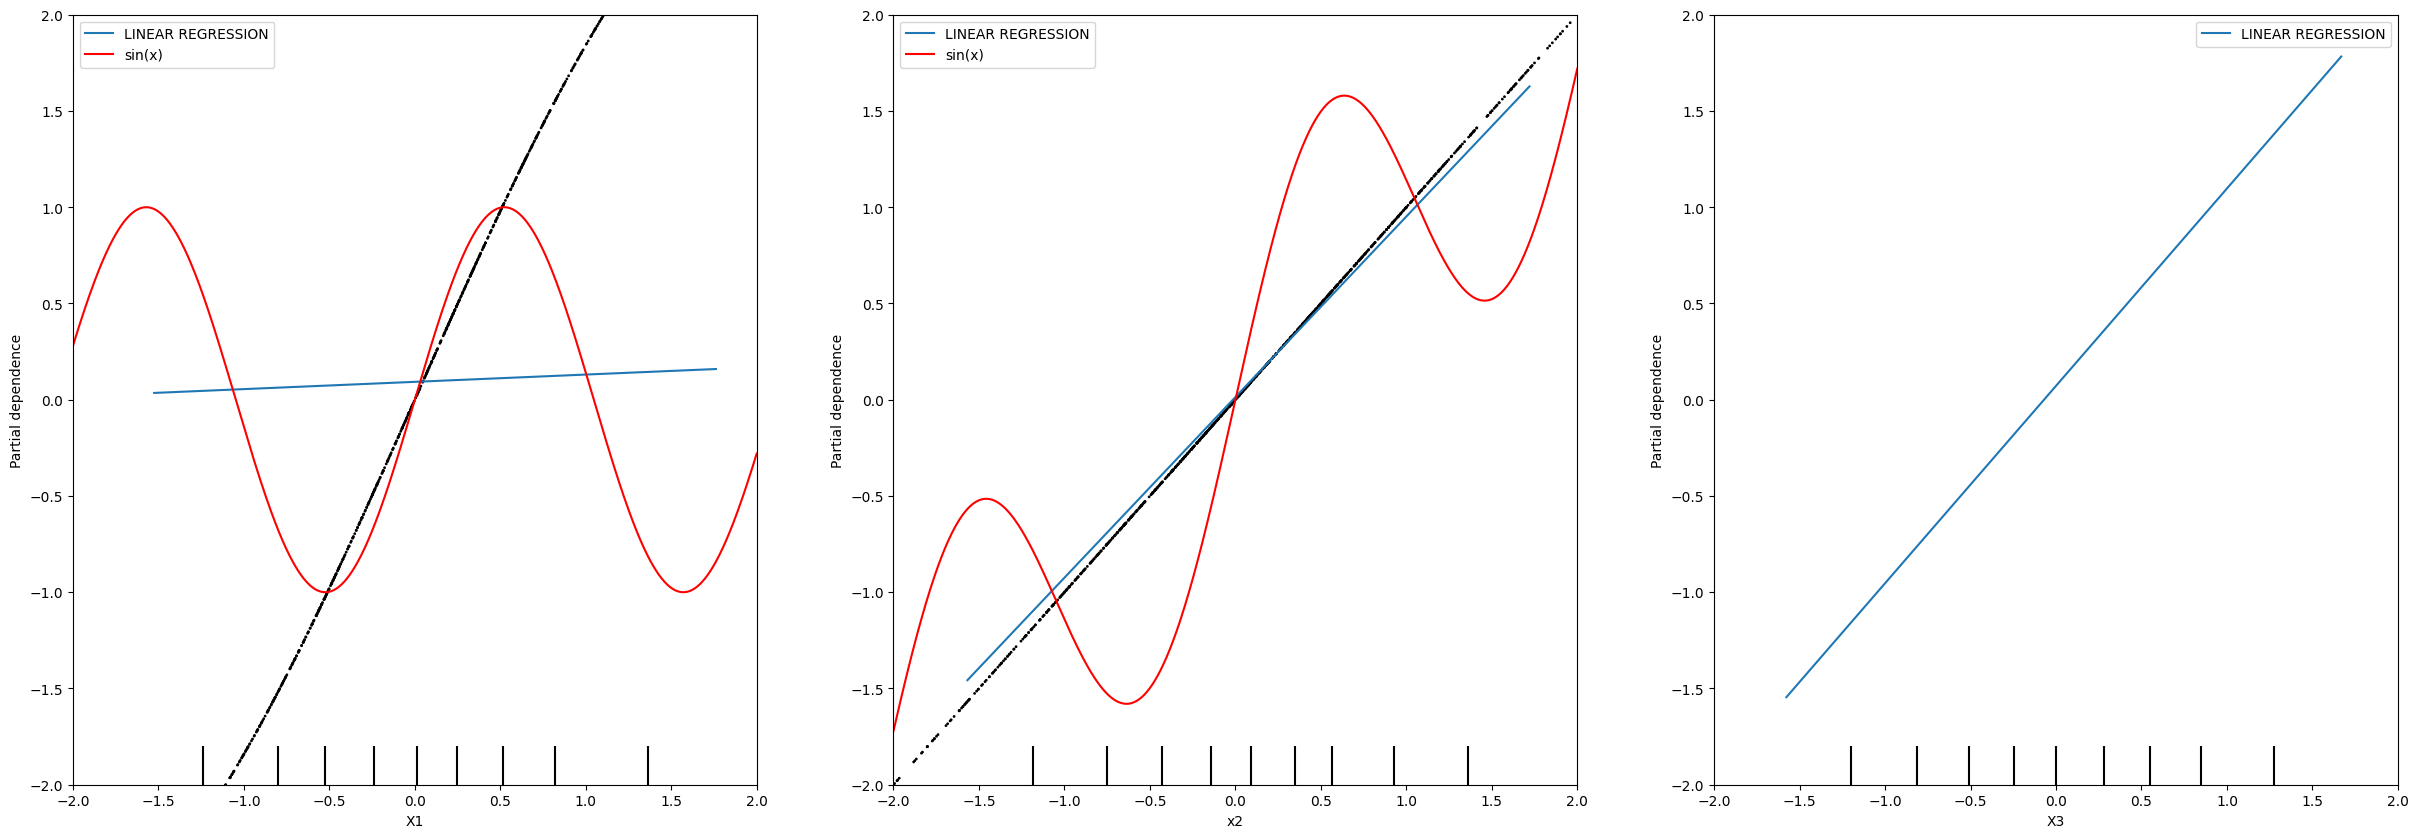

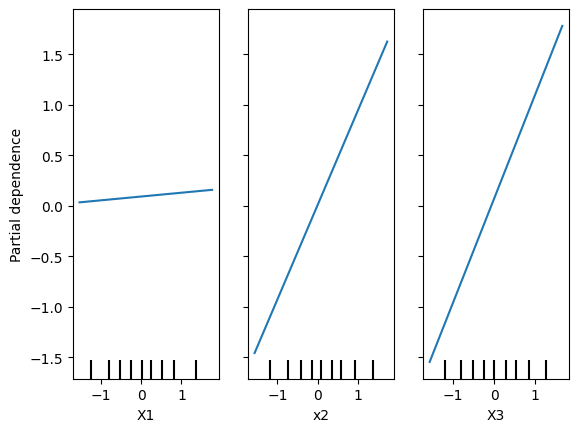

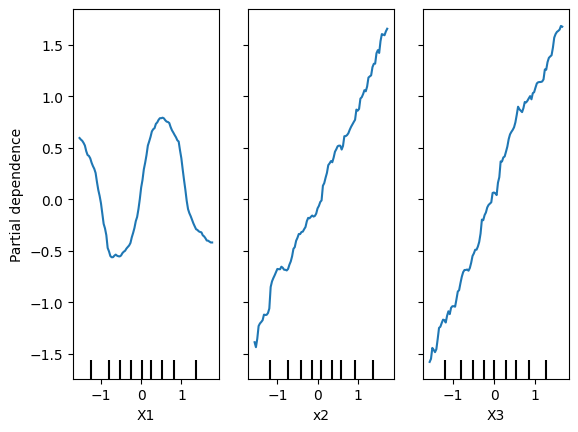

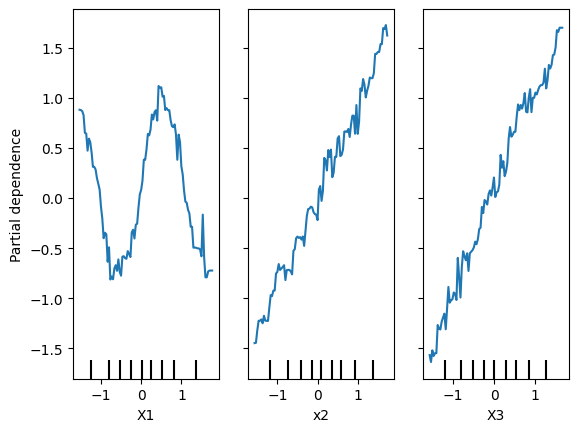

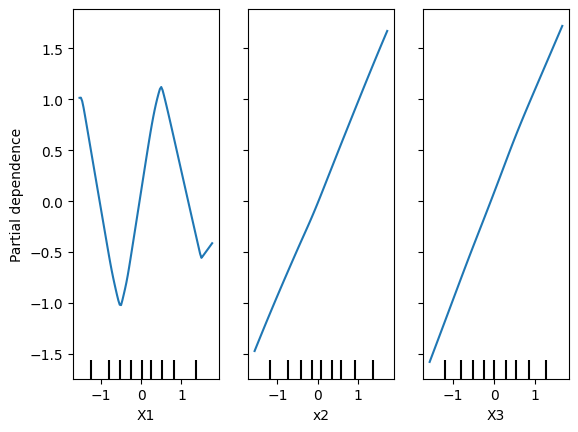

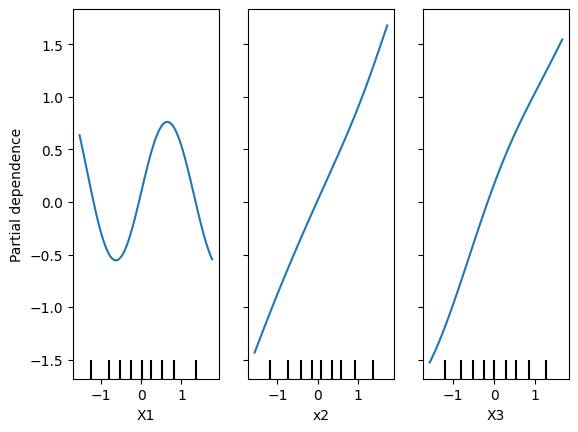

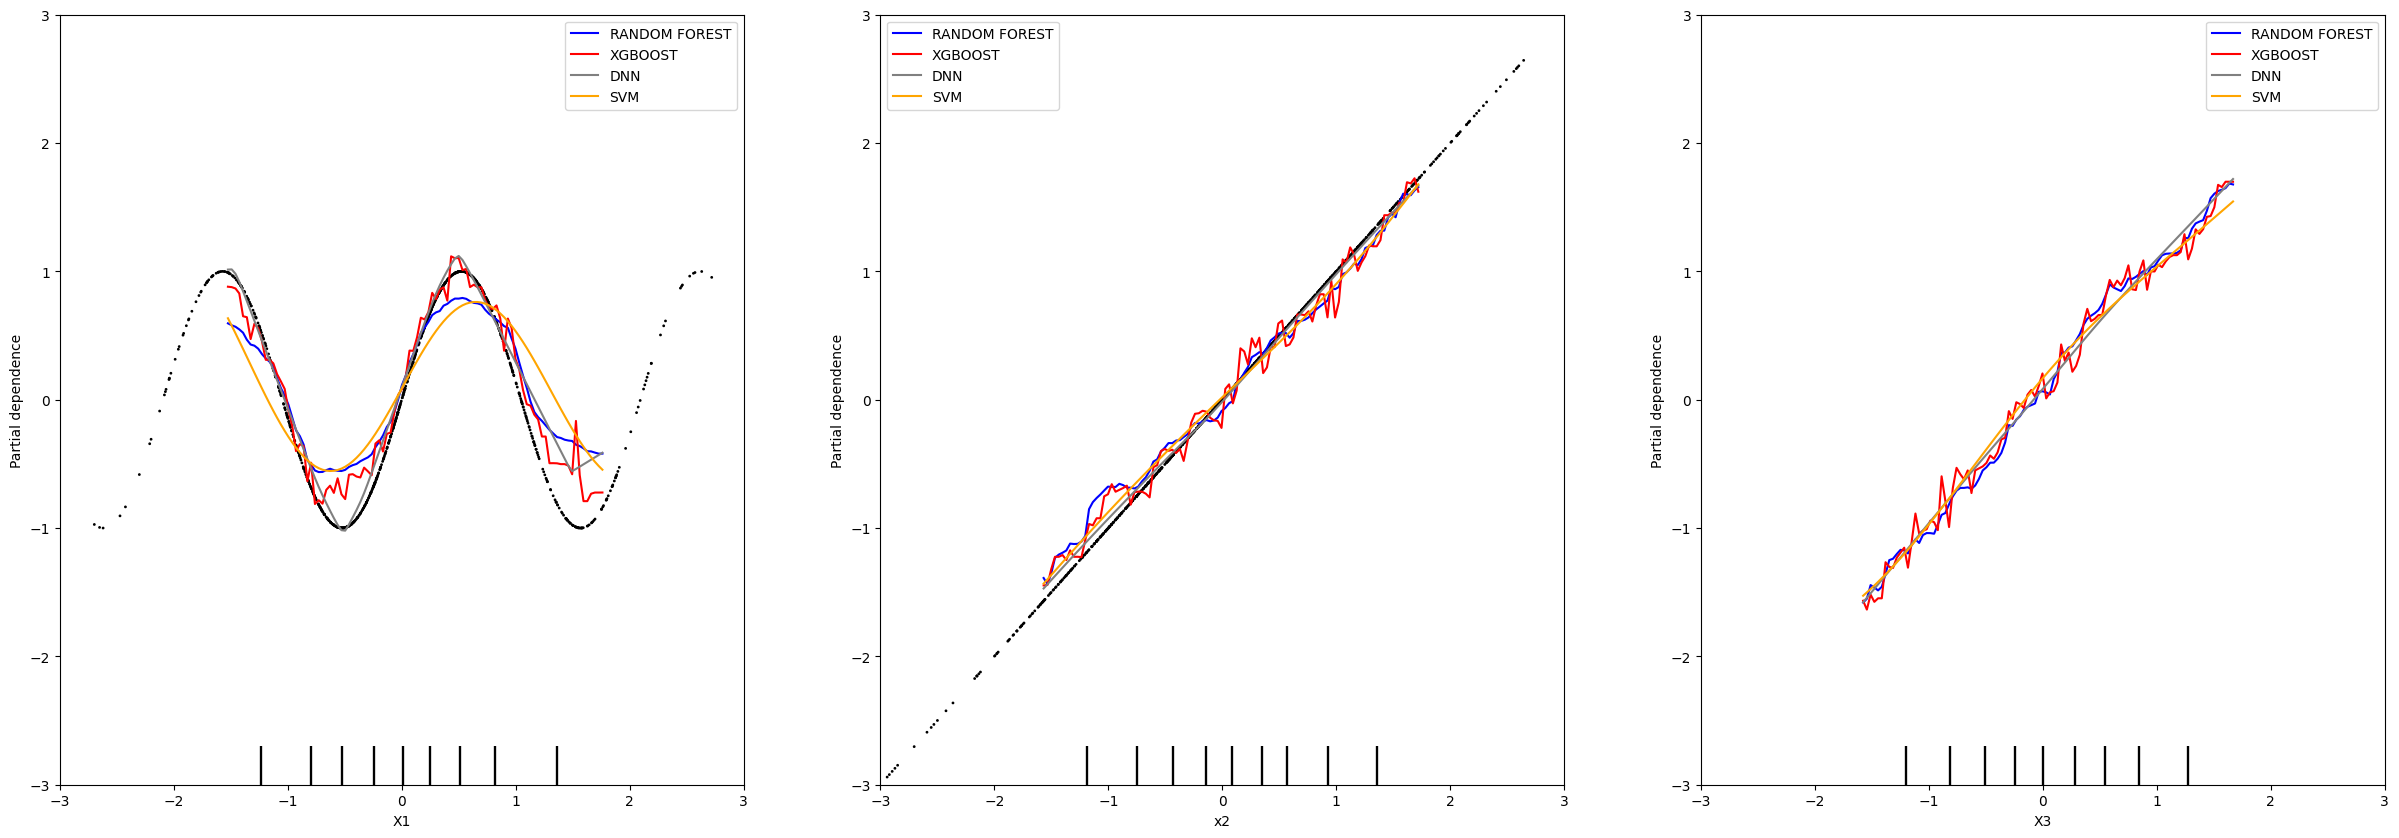

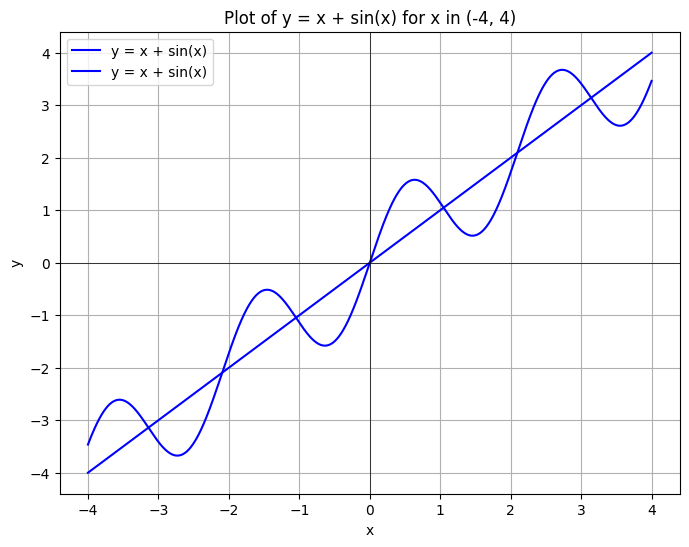

In [62]:
from sklearn.inspection import PartialDependenceDisplay


fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(30, 10))


lr_disp = PartialDependenceDisplay.from_estimator(linear_reg, X_train, features=[0,1,2],feature_names=["X1","x2","X3"])

rf_disp = PartialDependenceDisplay.from_estimator(rf_reg, X_train, features=[0,1,2],feature_names=["X1","x2","X3"])

xgb_disp = PartialDependenceDisplay.from_estimator(xgb_reg, X_train, features=[0,1,2],feature_names=["X1","x2","X3"])
mlp_disp = PartialDependenceDisplay.from_estimator(mlpr_model, X_train, features=[0,1,2],feature_names=["X1","x2","X3"])
svm_plot = PartialDependenceDisplay.from_estimator(svm_reg, X_train, features=[0,1,2],feature_names=["X1","x2","X3"])



lr_disp.plot(ax=[ax1, ax2,ax3], line_kw={"label": "LINEAR REGRESSION"},centered=False)
ax1.set_xlim([-2, 2]) 
ax1.set_ylim([-2, 2]) 
ax2.set_xlim([-2, 2]) 
ax2.set_ylim([-2, 2]) 
ax3.set_xlim([-2, 2]) 
ax3.set_ylim([-2, 2]) 
x_vals = np.linspace(-2, 2, 1000)
sin_vals = np.sin(3*x_vals)
ax1.plot(x_vals, sin_vals, label='sin(x)', color='red')
ax2.plot(x_vals, x_vals +sin_vals, label='sin(x)', color='red')
ax1.legend()
ax1.scatter(X1,X1 + np.sin(X1),linestyle='dashed',s=1,c=["black"])
ax2.scatter(X2, X2, linestyle='dashed',s=1,c=["black"])
ax1.legend()
ax2.legend()

fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(30, 10))
rf_disp.plot(
    ax=[ax1, ax2,ax3], line_kw={"label": "RANDOM FOREST", "color": "blue"}
)
xgb_disp.plot(ax=[ax1, ax2,ax3], line_kw={"label": "XGBOOST", "color": "red"})
mlp_disp.plot(ax=[ax1, ax2,ax3], line_kw={"label": "DNN", "color": "grey"})
svm_plot.plot(ax=[ax1, ax2,ax3], line_kw={"label": "SVM", "color": "orange"})

ax1.scatter(X1, np.sin(3*X1),linestyle='dashed',s=1,c=["black"])
ax2.scatter(X2, X2, linestyle='dashed',s=1,c=["black"])
ax1.set_xlim([-3, 3]) 
ax1.set_ylim([-3, 3]) 
ax2.set_xlim([-3, 3]) 
ax2.set_ylim([-3, 3]) 
ax3.set_xlim([-3, 3]) 
ax3.set_ylim([-3, 3]) 
ax1.legend()
ax2.legend()
# Generating x values
x = np.linspace(-4, 4, 1000)

# Calculating y values for the function y = x + sin(x)
y = x + np.sin(3*x)

# Plotting the function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='y = x + sin(x)', color='blue')
plt.plot(x, x, label='y = x + sin(x)', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x + sin(x) for x in (-4, 4)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.grid(True)
plt.show()


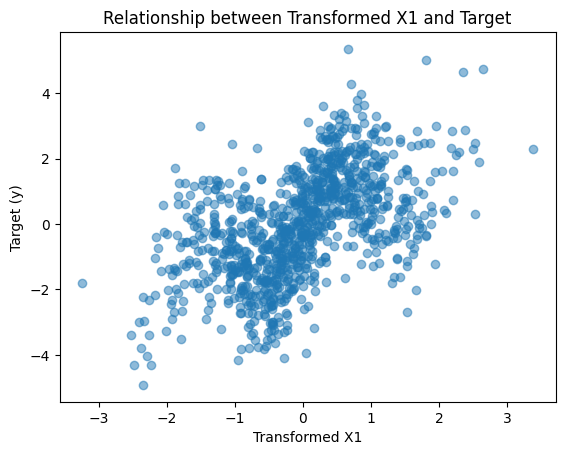

Linear Regression R^2 Score: 0.6988375365910642
Random Forest Regression R^2 Score: 0.8714971164020986
SVM Regression R^2 Score: 0.8386752307949452
XGBoost Regression R^2 Score: 0.8549703040755023


C:\Users\versu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

# Generating synthetic regression data with 3 features and non-linearity in X1
np.random.seed(42)
num_samples = 1000
# Generating correlated features (X1 and X2)
mean = [0, 0]
cov = [[1, 0.91], [0.91, 1]]  # Covariance matrix for X1 and X2 with correlation 0.9
X1_X2 = np.random.multivariate_normal(mean, cov, num_samples)
X1 = X1_X2[:, 0]
X2 = X1_X2[:, 1]
X1 = np.random.randn(num_samples)
X2 = X1.copy()

X3 = np.random.randn(num_samples)
X4 = np.random.randn(num_samples)


# Introducing non-linearity in X1 (squaring X1)
X1_t = np.sin(3*X1)

# Target variable (y) as the sum of features plus noise
noise = np.random.normal(0, 0.5, num_samples)  # Adding noise
y = X1_t + X2 + X3 + noise

# Reshape features to a 2D array
X = np.vstack((X1, X2, X3,X4)).T
# Plotting X1_transformed against y
plt.scatter(X1, y, alpha=0.5)
plt.xlabel('Transformed X1')
plt.ylabel('Target (y)')
plt.title('Relationship between Transformed X1 and Target')
plt.show()

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting different regression models
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Support Vector Machine Regression
svm_reg = SVR(kernel='rbf')
svm_reg.fit(X_train, y_train)

# XGBoost Regression
xgb_reg = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_reg.fit(X_train, y_train)

# XGBoost Regression
mlpr_model = MLPRegressor(hidden_layer_sizes=50,max_iter=1000)
mlpr_model.fit(X_train, y_train)
# Evaluate models
linear_reg_score = linear_reg.score(X_test, y_test)
rf_reg_score = rf_reg.score(X_test, y_test)
svm_reg_score = svm_reg.score(X_test, y_test)
xgb_reg_score = xgb_reg.score(X_test, y_test)
data = pd.DataFrame({"X1":X1,"X2":X2,"X3":X3,"Y":y})
print(f"Linear Regression R^2 Score: {linear_reg_score}")
print(f"Random Forest Regression R^2 Score: {rf_reg_score}")
print(f"SVM Regression R^2 Score: {svm_reg_score}")
print(f"XGBoost Regression R^2 Score: {xgb_reg_score}")


<Figure size 640x480 with 0 Axes>

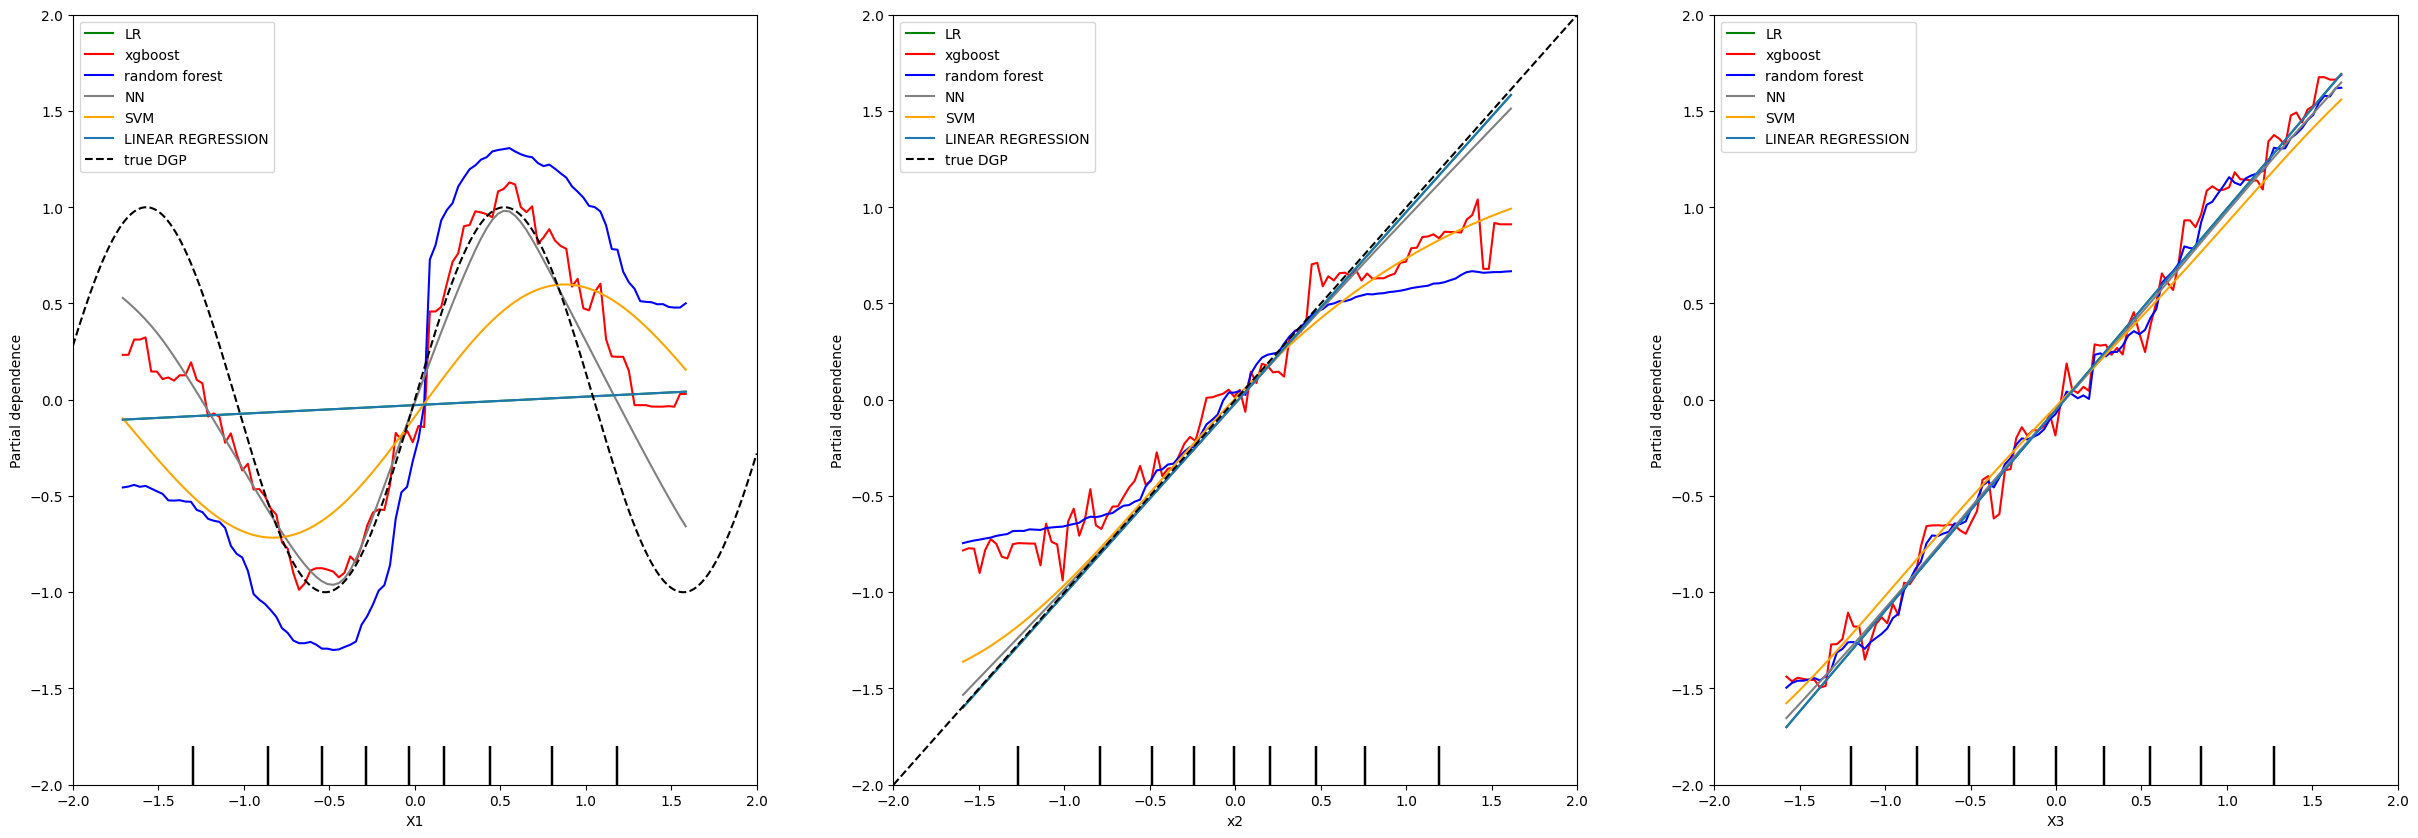

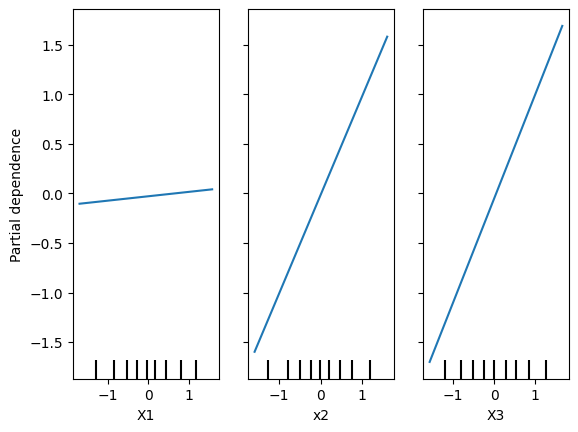

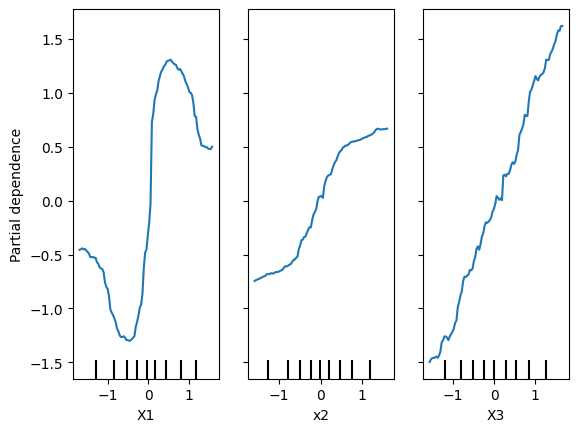

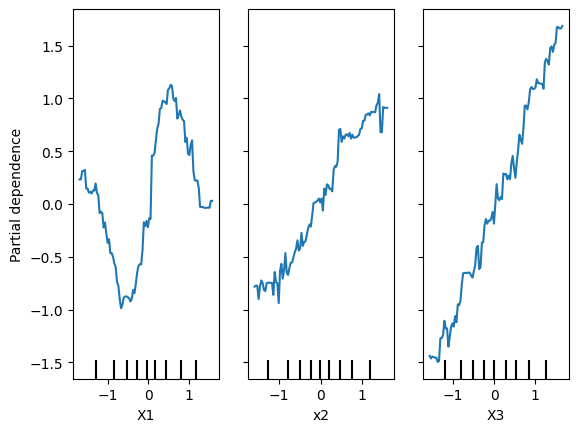

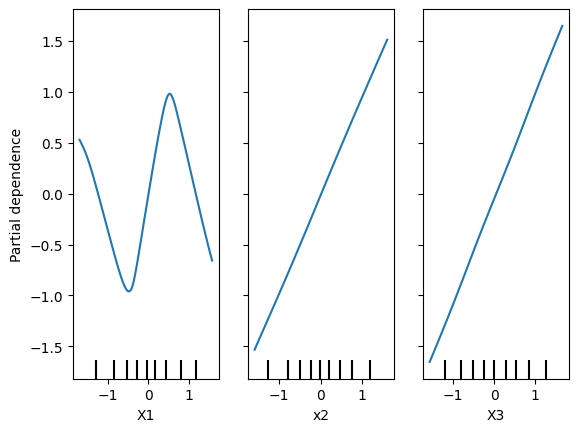

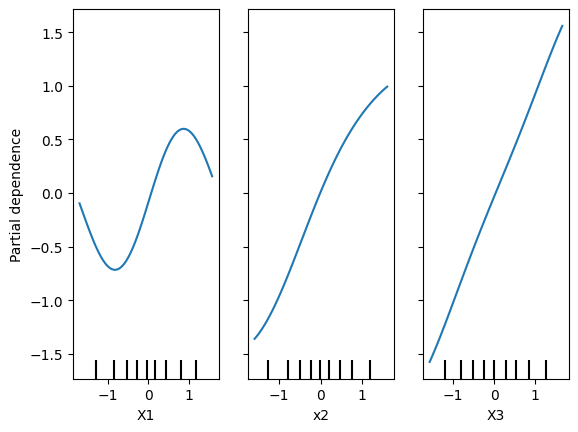

In [33]:
from sklearn.inspection import PartialDependenceDisplay


plt.clf()

fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(30, 10))


lr_disp = PartialDependenceDisplay.from_estimator(linear_reg, X_train, features=[0,1,2],feature_names=["X1","x2","X3"])
rf_disp = PartialDependenceDisplay.from_estimator(rf_reg, X_train, features=[0,1,2],feature_names=["X1","x2","X3"])
xgb_disp = PartialDependenceDisplay.from_estimator(xgb_reg, X_train, features=[0,1,2],feature_names=["X1","x2","X3"])
mlp_disp = PartialDependenceDisplay.from_estimator(mlpr_model, X_train, features=[0,1,2],feature_names=["X1","x2","X3"])
svm_disp = PartialDependenceDisplay.from_estimator(svm_reg, X_train, features=[0,1,2],feature_names=["X1","x2","X3"])

lr_disp.plot(ax=[ax1, ax2,ax3], line_kw={"label": "LR","color":'green'})
xgb_disp.plot(ax=[ax1, ax2,ax3], line_kw={"label": "xgboost","color":'red'})
rf_disp.plot(ax=[ax1, ax2,ax3], line_kw={"label": "random forest","color":'blue'})
mlp_disp.plot(ax=[ax1, ax2,ax3], line_kw={"label": "NN","color":'grey'})
svm_disp.plot(ax=[ax1, ax2,ax3], line_kw={"label": "SVM","color":'orange'})


lr_disp.plot(ax=[ax1, ax2,ax3], line_kw={"label": "LINEAR REGRESSION"},centered=False)
ax1.set_xlim([-2, 2]) 
ax1.set_ylim([-2, 2]) 
ax2.set_xlim([-2, 2]) 
ax2.set_ylim([-2, 2]) 
ax3.set_xlim([-2, 2]) 
ax3.set_ylim([-2, 2]) 
x_vals = np.linspace(-2, 2, 1000)
sin_vals = np.sin(3*x_vals)
ax1.plot(x_vals, sin_vals, label='true DGP', color='black',linestyle='dashed')
ax1.legend()
ax2.plot(x_vals, x_vals, label='true DGP', color='black',linestyle='dashed')
ax2.legend()



xgb and nn were good at capturing the trend in the data. random forst had problem in areas with small datapoints. on the other hand random forst was not gereat in margins

dpandance

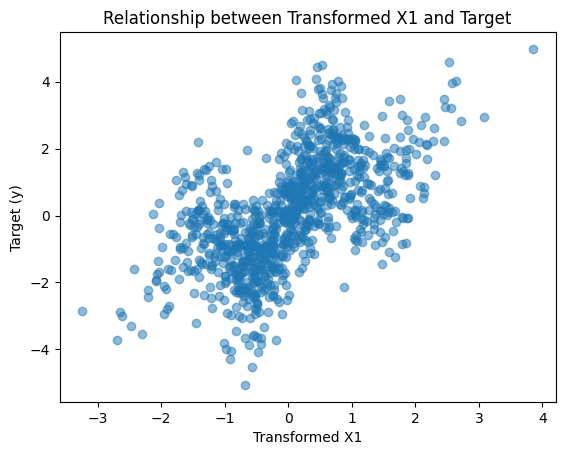

Linear Regression R^2 Score: 0.7284126575065981
Random Forest Regression R^2 Score: 0.8763473958662557
SVM Regression R^2 Score: 0.8709268861929436
XGBoost Regression R^2 Score: 0.8693077572353842


C:\Users\versu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [34]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

# Generating synthetic regression data with 3 features and non-linearity in X1
np.random.seed(42)
num_samples = 1000
# Generating correlated features (X1 and X2)
mean = [0, 0]
cov = [[1, 0.91], [0.91, 1]]  # Covariance matrix for X1 and X2 with correlation 0.9
X1 = np.random.randn(num_samples)
X2 = X1.copy()

X3 = np.random.randn(num_samples)
X4 = np.random.randn(num_samples)


# Introducing non-linearity in X1 (squaring X1)
X1_t = np.sin(3*X1)

# Target variable (y) as the sum of features plus noise
noise = np.random.normal(0, 0.5, num_samples)  # Adding noise
y = X1_t + X2 + X3 + noise

# Reshape features to a 2D array
X = np.vstack((X1, X2, X3,X4)).T
# Plotting X1_transformed against y
plt.scatter(X1, y, alpha=0.5)
plt.xlabel('Transformed X1')
plt.ylabel('Target (y)')
plt.title('Relationship between Transformed X1 and Target')
plt.show()

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting different regression models
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Support Vector Machine Regression
svm_reg = SVR(kernel='rbf')
svm_reg.fit(X_train, y_train)

# XGBoost Regression
xgb_reg = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_reg.fit(X_train, y_train)

# XGBoost Regression
mlpr_model = MLPRegressor(hidden_layer_sizes=50,max_iter=1000)
mlpr_model.fit(X_train, y_train)
# Evaluate models
linear_reg_score = linear_reg.score(X_test, y_test)
rf_reg_score = rf_reg.score(X_test, y_test)
svm_reg_score = svm_reg.score(X_test, y_test)
xgb_reg_score = xgb_reg.score(X_test, y_test)
data = pd.DataFrame({"X1":X1,"X2":X2,"X3":X3,"Y":y})
print(f"Linear Regression R^2 Score: {linear_reg_score}")
print(f"Random Forest Regression R^2 Score: {rf_reg_score}")
print(f"SVM Regression R^2 Score: {svm_reg_score}")
print(f"XGBoost Regression R^2 Score: {xgb_reg_score}")


In [ ]:
from sklearn.inspection import PartialDependenceDisplay


plt.clf()

fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(30, 10))


lr_disp = PartialDependenceDisplay.from_estimator(linear_reg, X_train, features=[0,1,2],feature_names=["X1","x2","X3"])
rf_disp = PartialDependenceDisplay.from_estimator(rf_reg, X_train, features=[0,1,2],feature_names=["X1","x2","X3"])
xgb_disp = PartialDependenceDisplay.from_estimator(xgb_reg, X_train, features=[0,1,2],feature_names=["X1","x2","X3"])
mlp_disp = PartialDependenceDisplay.from_estimator(mlpr_model, X_train, features=[0,1,2],feature_names=["X1","x2","X3"])
svm_disp = PartialDependenceDisplay.from_estimator(svm_reg, X_train, features=[0,1,2],feature_names=["X1","x2","X3"])

lr_disp.plot(ax=[ax1, ax2,ax3], line_kw={"label": "LR","color":'green'})
xgb_disp.plot(ax=[ax1, ax2,ax3], line_kw={"label": "xgboost","color":'red'})
rf_disp.plot(ax=[ax1, ax2,ax3], line_kw={"label": "random forest","color":'blue'})
mlp_disp.plot(ax=[ax1, ax2,ax3], line_kw={"label": "NN","color":'grey'})
svm_disp.plot(ax=[ax1, ax2,ax3], line_kw={"label": "SVM","color":'orange'})


lr_disp.plot(ax=[ax1, ax2,ax3], line_kw={"label": "LINEAR REGRESSION"},centered=False)
ax1.set_xlim([-2, 2]) 
ax1.set_ylim([-2, 2]) 
ax2.set_xlim([-2, 2]) 
ax2.set_ylim([-2, 2]) 
ax3.set_xlim([-2, 2]) 
ax3.set_ylim([-2, 2]) 
x_vals = np.linspace(-2, 2, 1000)
sin_vals = np.sin(3*x_vals)
ax1.plot(x_vals, sin_vals, label='true DGP', color='black',linestyle='dashed')
ax1.legend()
ax2.plot(x_vals, x_vals, label='true DGP', color='black',linestyle='dashed')
ax2.legend()



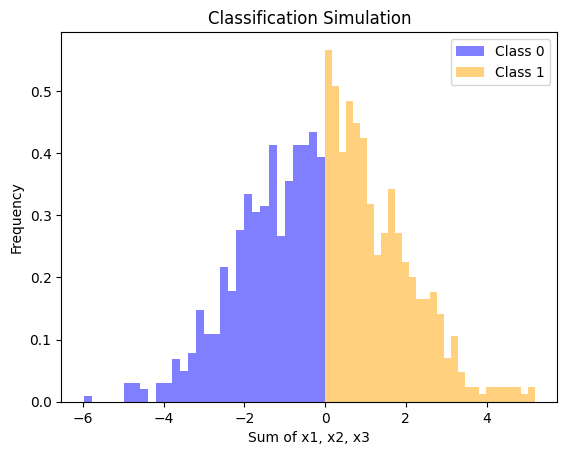

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set the parameters
num_samples = 1000  # Number of samples
mean = 0  # Mean of the normal distribution
std_dev = 1  # Standard deviation of the normal distribution
threshold = 0  # Threshold for classification

# Generate random values for x1, x2, x3 from normal distribution
x1 = np.random.normal(mean, std_dev, num_samples)
x2 = np.random.normal(mean, std_dev, num_samples)
x3 = np.random.normal(mean, std_dev, num_samples)

# Calculate the sum of x1, x2, x3
sum_values = x1 + x2 + x3
X = np.column_stack((x1, x2, x3))

# Assign labels based on the sum compared to the threshold
labels = np.where(sum_values > threshold, 1, 0)

# Visualizing the distribution of the sum_values for each class
plt.hist(sum_values[labels == 0], bins=30, density=True, alpha=0.5, color='blue', label='Class 0')
plt.hist(sum_values[labels == 1], bins=30, density=True, alpha=0.5, color='orange', label='Class 1')
plt.title('Classification Simulation')
plt.xlabel('Sum of x1, x2, x3')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
# Split data into train and test sets
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC


X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Logistic Regression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
logistic_reg_pred = logistic_reg.predict(X_test)
logistic_reg_accuracy = accuracy_score(y_test, logistic_reg_pred)
print("Logistic Regression Accuracy:", logistic_reg_accuracy)

# Support Vector Machine
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

# k-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_accuracy)

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
rf_pred = random_forest.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

# Deep Neural Network (MLPClassifier)
dnn_model = MLPClassifier(hidden_layer_sizes=50, max_iter=1000)
dnn_model.fit(X_train, y_train)
dnn_pred = dnn_model.predict(X_test)
dnn_accuracy = accuracy_score(y_test, dnn_pred)
print("DNN (MLP) Accuracy:", dnn_accuracy)

Logistic Regression Accuracy: 0.995
SVM Accuracy: 0.995
KNN Accuracy: 0.94
Random Forest Accuracy: 0.96
DNN (MLP) Accuracy: 1.0


<Figure size 2000x400 with 0 Axes>

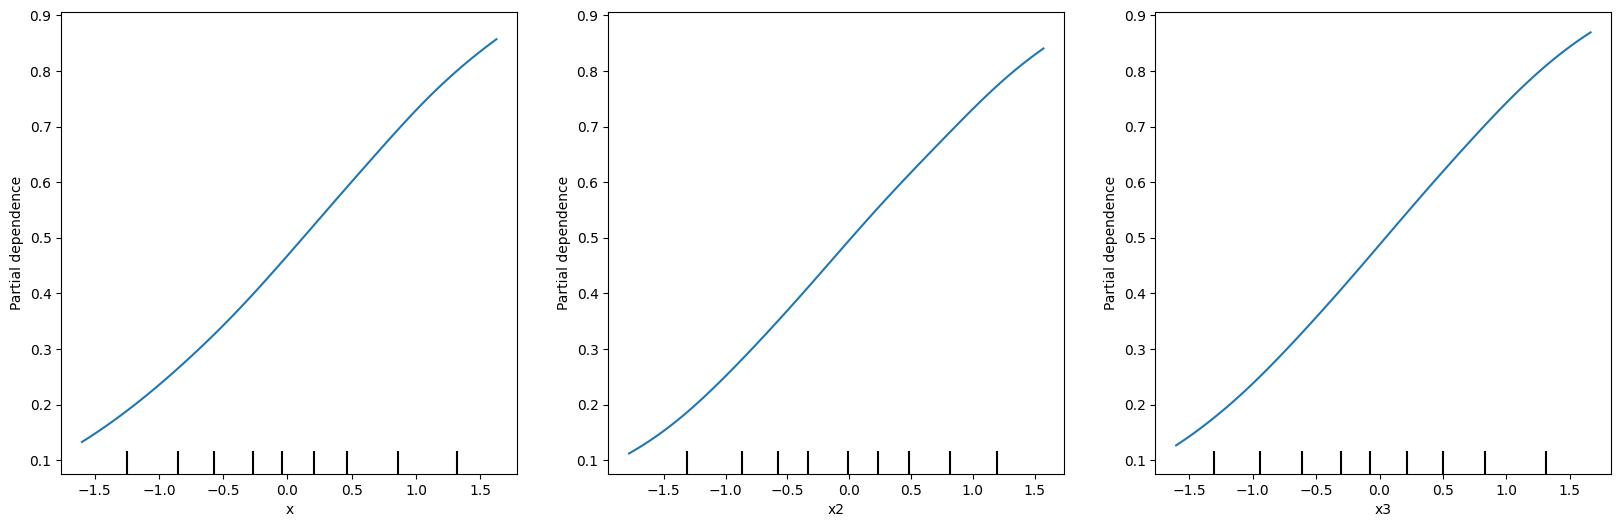

<Figure size 2000x400 with 0 Axes>

<Figure size 2000x400 with 0 Axes>

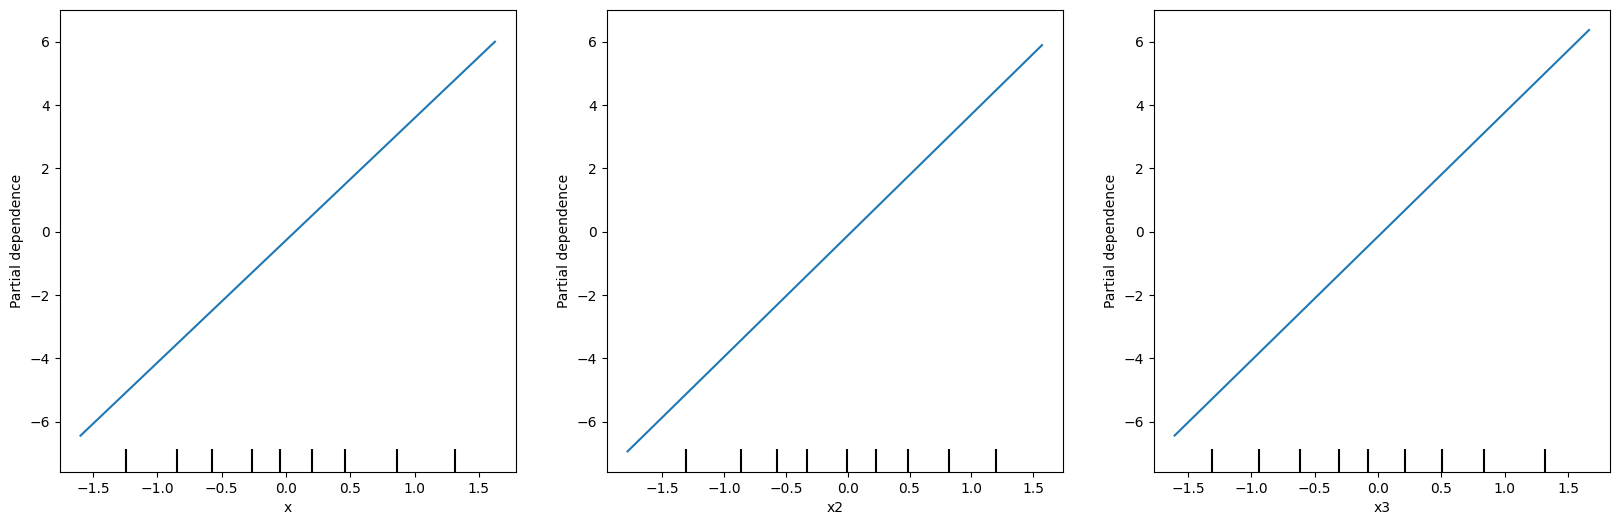

<Figure size 2000x400 with 0 Axes>

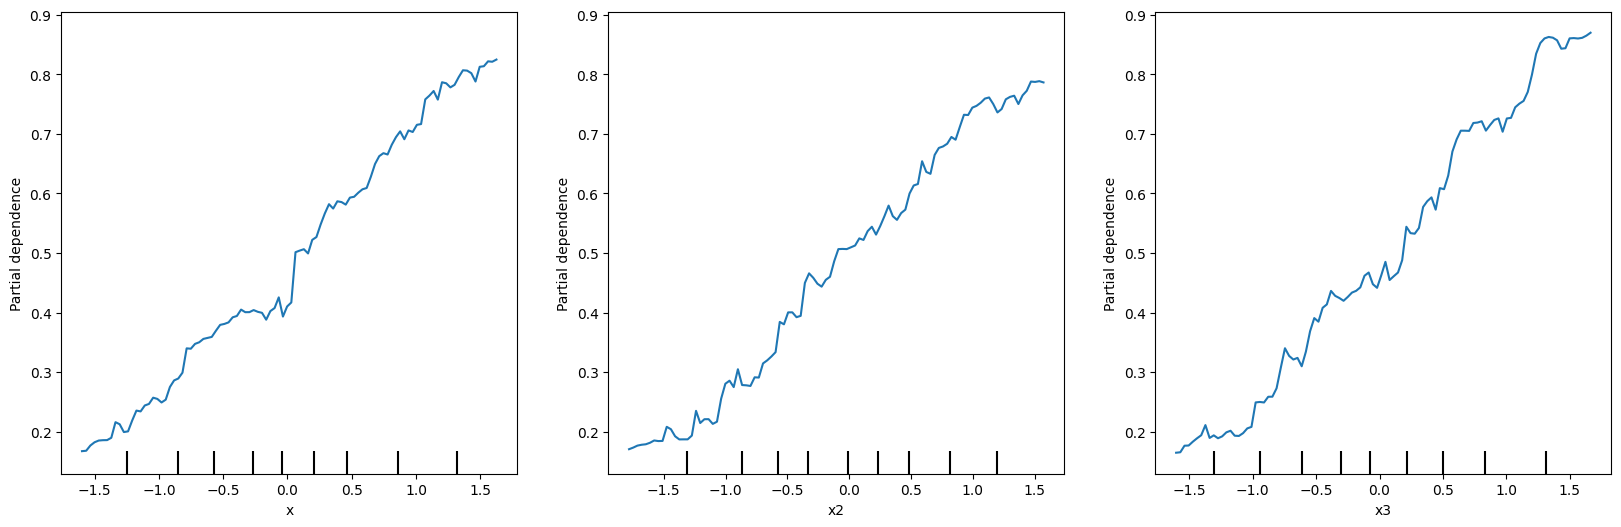

<Figure size 2000x400 with 0 Axes>

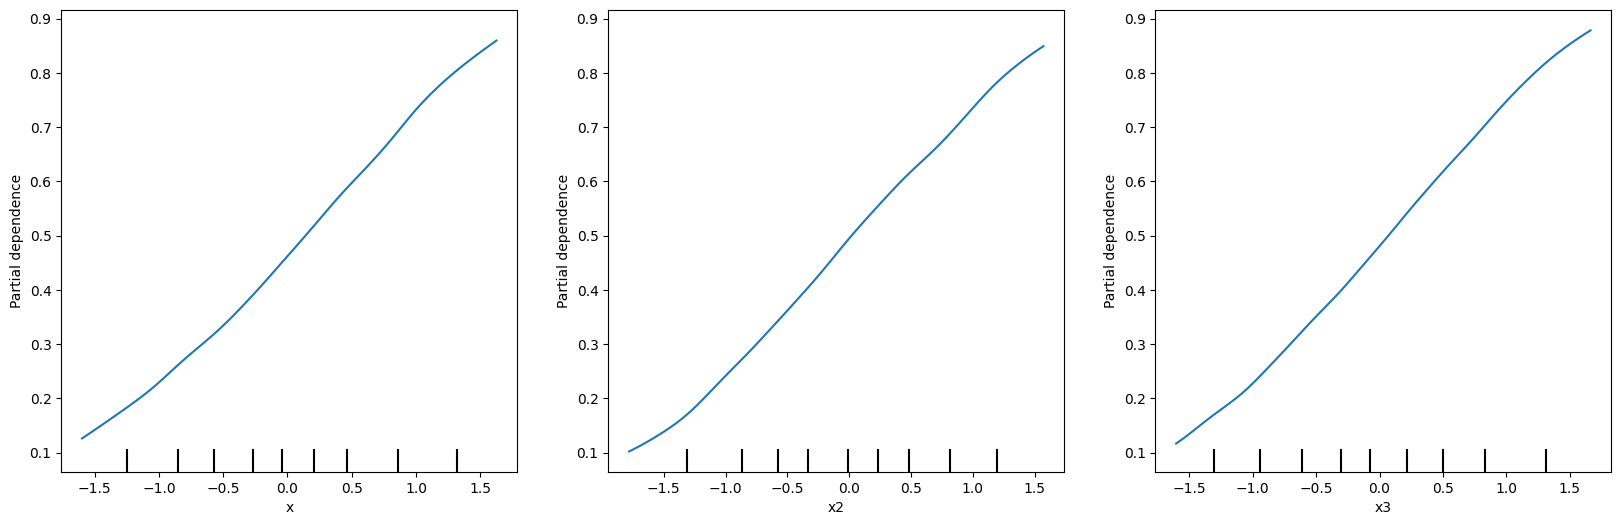

<Figure size 2000x400 with 0 Axes>

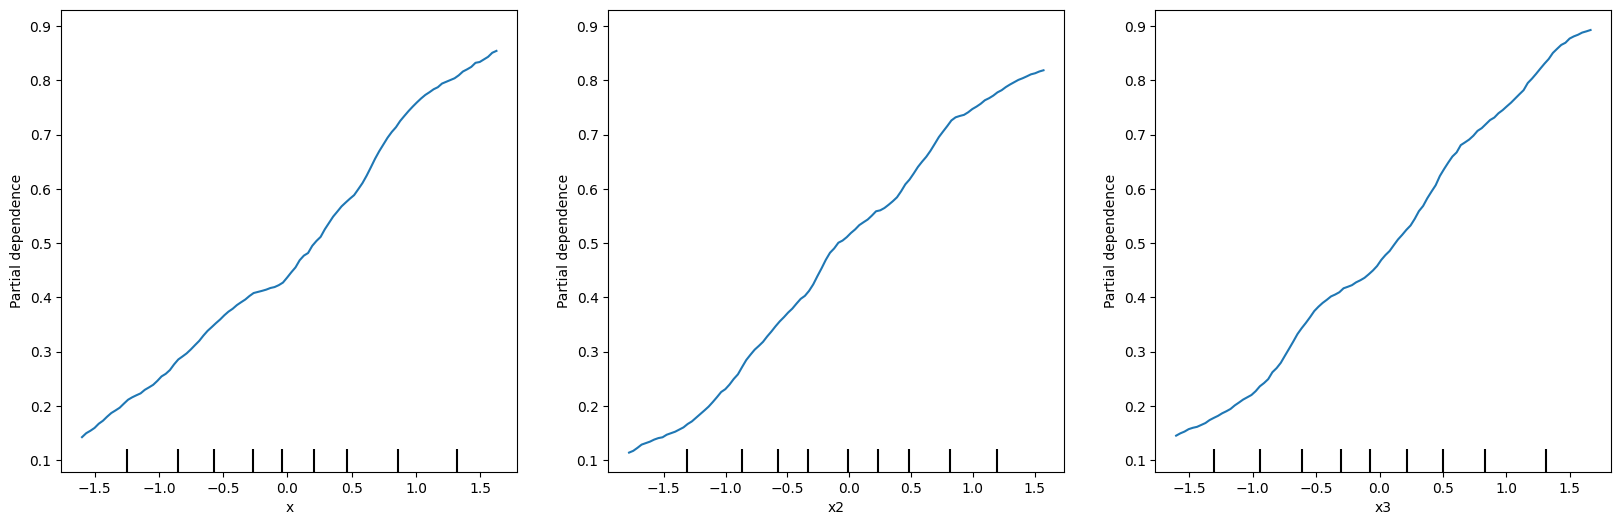

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pylab as plt

plt.figure(figsize=(20, 4))  # Adjust the figure size as needed

# First subplot with two lines for sine waves
fig,(ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(20, 6))  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(logistic_reg, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=[ax1,ax2,ax3])
plt.figure(figsize=(20, 4))  # Adjust the figure size as needed


plt.figure(figsize=(20, 4))  # Adjust the figure size as needed

# First subplot with two lines for sine waves
fig,(ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(20, 6))  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(svm_model, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=[ax1,ax2,ax3])
plt.figure(figsize=(20, 4))  # Adjust the figure size as needed

# First subplot with two lines for sine waves
fig,(ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(20, 6))  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(random_forest, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=[ax1,ax2,ax3])
plt.figure(figsize=(20, 4))  # Adjust the figure size as needed

# First subplot with two lines for sine waves
fig,(ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(20, 6))  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(dnn_model, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=[ax1,ax2,ax3])
plt.figure(figsize=(20, 4))  # Adjust the figure size as needed
# First subplot with two lines for sine waves
fig,(ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(20, 6))  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(knn_model, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=[ax1,ax2,ax3])


In [ ]:
# Split data into train and test sets
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Set the parameters
num_samples = 1000  # Number of samples
mean = 0  # Mean of the normal distribution
std_dev = 1  # Standard deviation of the normal distribution
threshold = 0  # Threshold for classification

# Generate random values for x1, x2, x3 from normal distribution
x1 = np.random.normal(mean, std_dev, num_samples)
x2 = np.random.normal(mean, std_dev, num_samples)
x3 = np.random.normal(mean, std_dev, num_samples)

# Calculate the sum of x1, x2, x3
sum_values = np.sin(3 * x1) + x2 + x3
X = np.column_stack((x1, x2, x3))

# Assign labels based on the sum compared to the threshold
labels = np.where(sum_values > threshold, 1, 0)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Logistic Regression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
logistic_reg_pred = logistic_reg.predict(X_test)
logistic_reg_accuracy = accuracy_score(y_test, logistic_reg_pred)
print("Logistic Regression Accuracy:", logistic_reg_accuracy)

# Support Vector Machine
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

# k-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_accuracy)

# k-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_accuracy)
# xgb
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print("xgb Accuracy:", xgb_accuracy)
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
rf_pred = random_forest.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

# Deep Neural Network (MLPClassifier)
dnn_model = MLPClassifier(hidden_layer_sizes=50, max_iter=1000)
dnn_model.fit(X_train, y_train)
dnn_pred = dnn_model.predict(X_test)
dnn_accuracy = accuracy_score(y_test, dnn_pred)
print("DNN (MLP) Accuracy:", dnn_accuracy)

Logistic Regression Accuracy: 0.815
SVM Accuracy: 0.815
KNN Accuracy: 0.915
KNN Accuracy: 0.915
xgb Accuracy: 0.93
Random Forest Accuracy: 0.94
DNN (MLP) Accuracy: 0.915


C:\Users\versu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


<Figure size 2000x400 with 0 Axes>

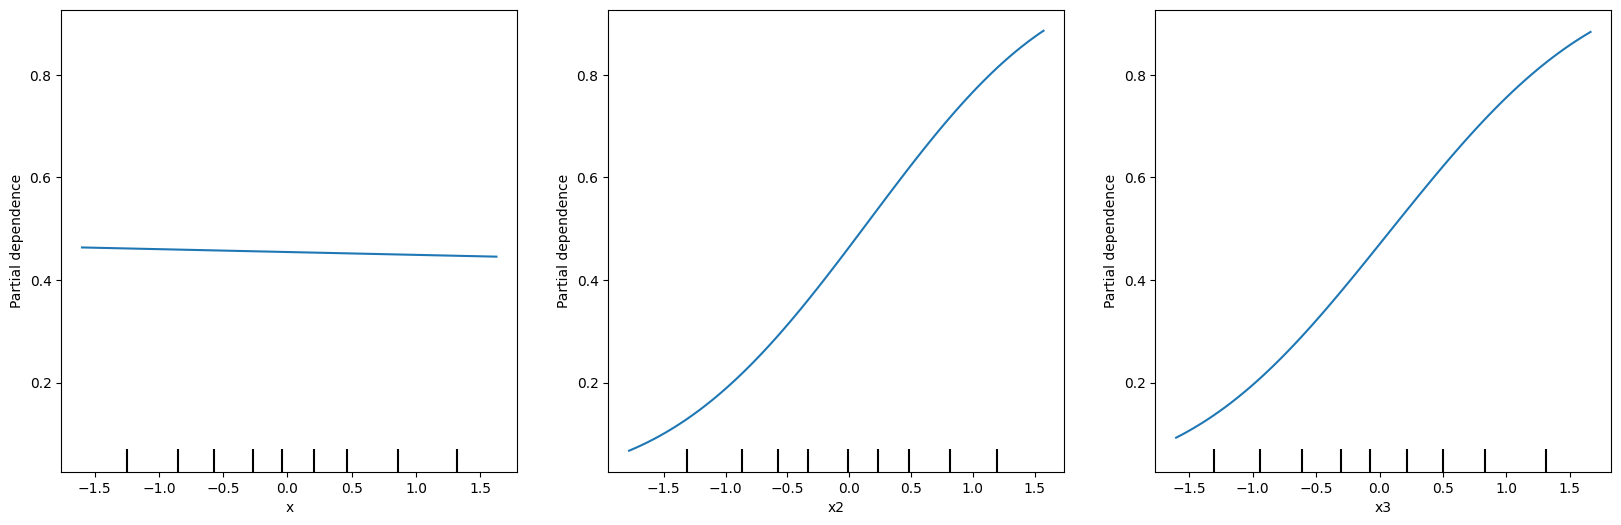

<Figure size 2000x400 with 0 Axes>

<Figure size 2000x400 with 0 Axes>

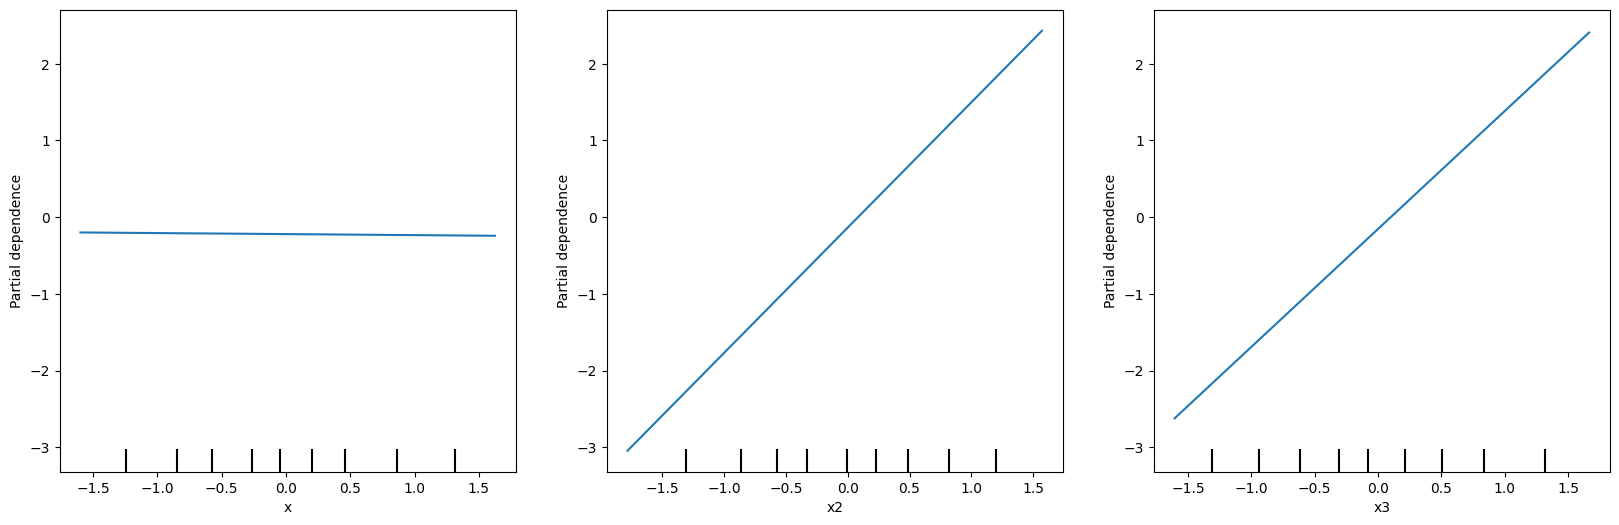

<Figure size 2000x400 with 0 Axes>

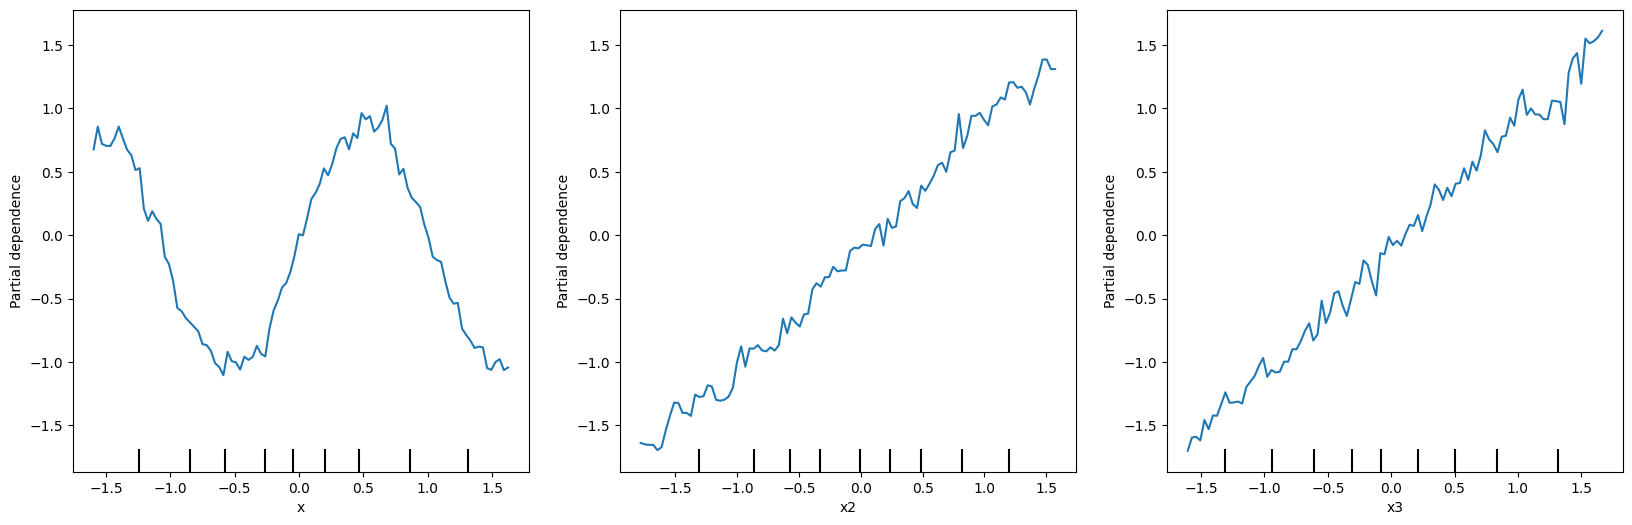

<Figure size 2000x400 with 0 Axes>

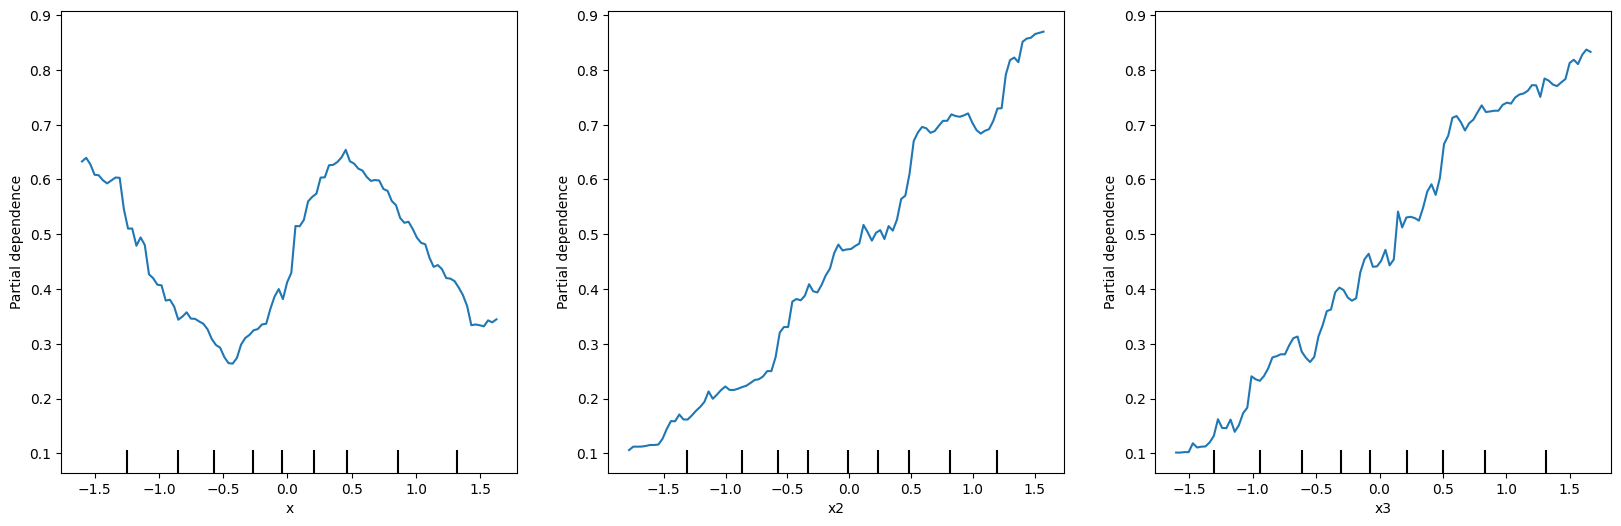

<Figure size 2000x400 with 0 Axes>

<Figure size 2000x400 with 0 Axes>

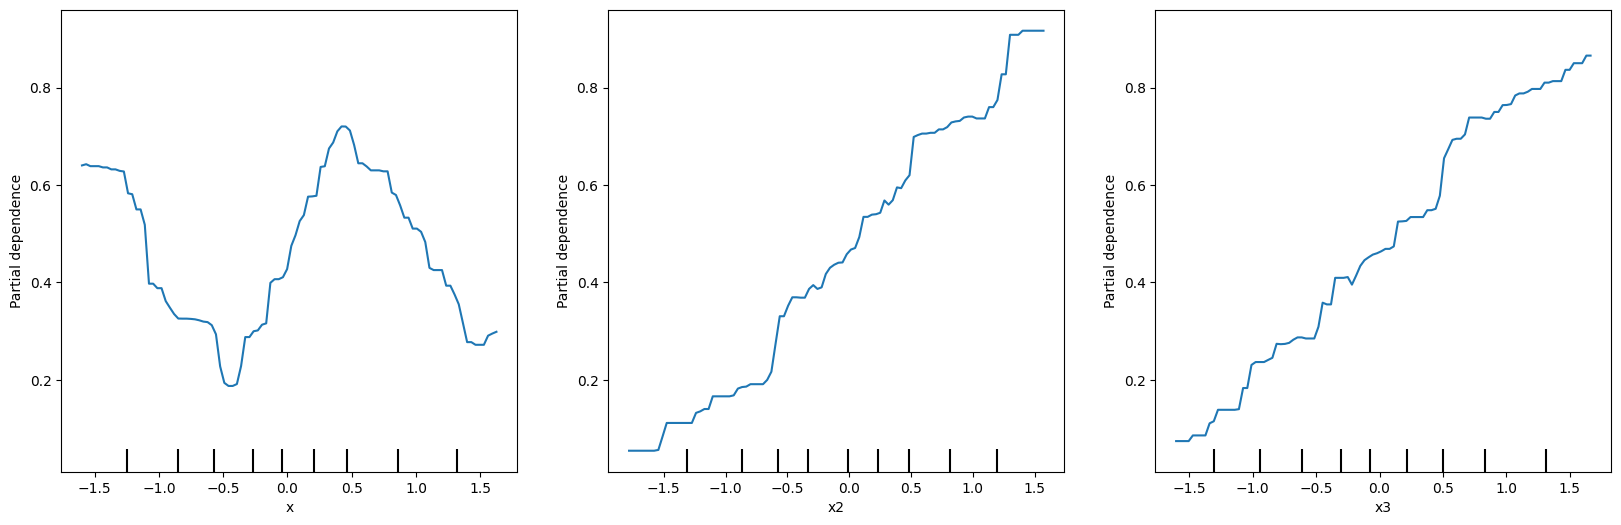

<Figure size 2000x400 with 0 Axes>

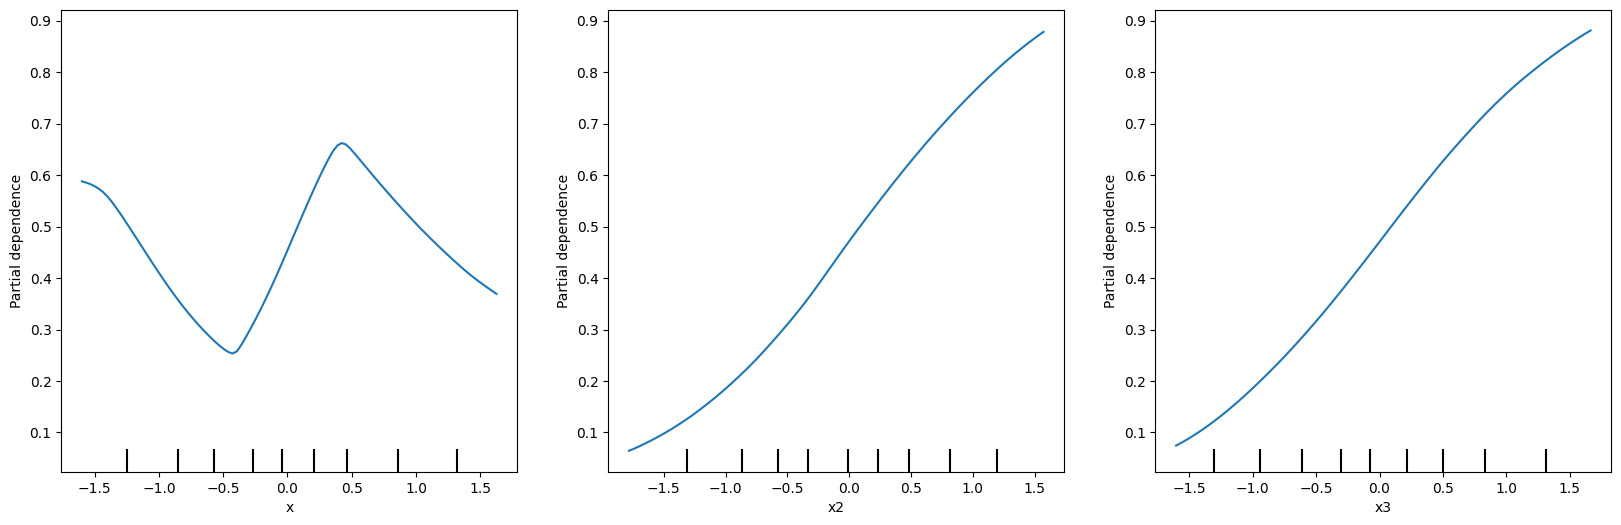

<Figure size 2000x400 with 0 Axes>

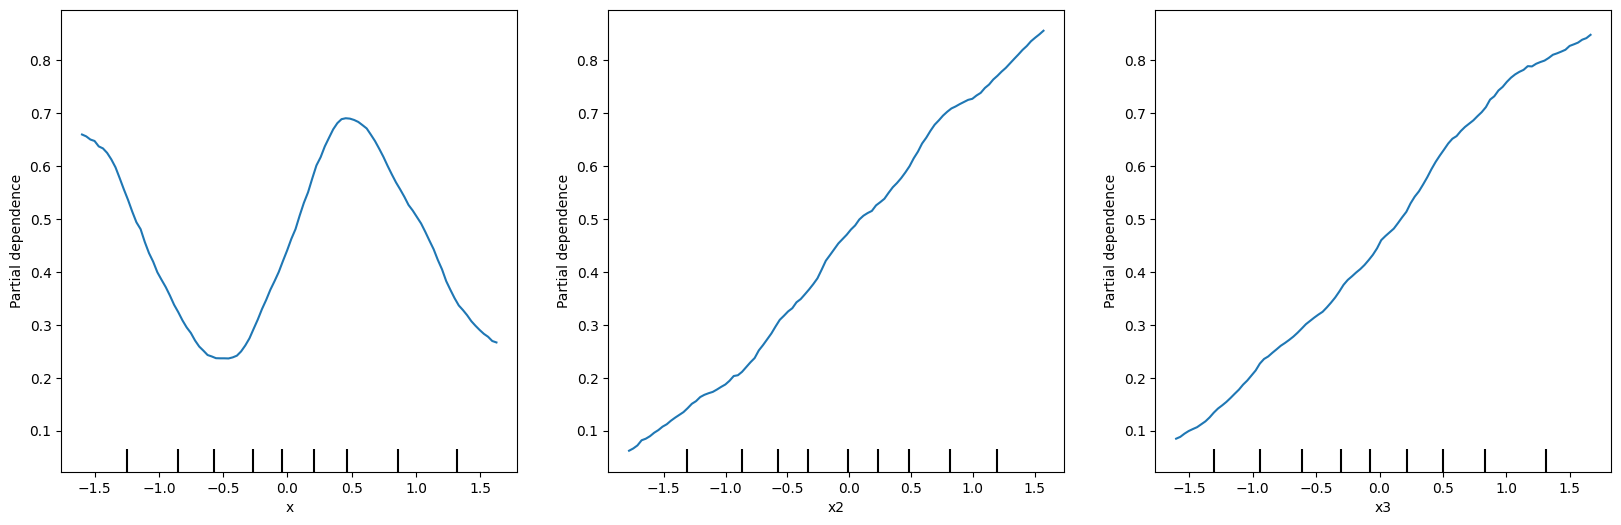

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pylab as plt

plt.figure(figsize=(20, 4))  # Adjust the figure size as needed

# First subplot with two lines for sine waves
fig,(ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(20, 6))  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(logistic_reg, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=[ax1,ax2,ax3])
plt.figure(figsize=(20, 4))  # Adjust the figure size as needed


plt.figure(figsize=(20, 4))  # Adjust the figure size as needed

# First subplot with two lines for sine waves
fig,(ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(20, 6))  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(svm_model, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=[ax1,ax2,ax3])
plt.figure(figsize=(20, 4))  # Adjust the figure size as needed
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
# First subplot with two lines for sine waves
fig,(ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(20, 6))  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(xgb_reg, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=[ax1,ax2,ax3])
plt.figure(figsize=(20, 4))  # Adjust the figure size as needed
# First subplot with two lines for sine waves
fig,(ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(20, 6))  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(random_forest, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=[ax1,ax2,ax3])
plt.figure(figsize=(20, 4))  # Adjust the figure size as needed
plt.figure(figsize=(20, 4))  # Adjust the figure size as needed
# First subplot with two lines for sine waves
fig,(ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(20, 6))  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(xgb_model, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=[ax1,ax2,ax3])
plt.figure(figsize=(20, 4))  # Adjust the figure size as needed
# First subplot with two lines for sine waves
fig,(ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(20, 6))  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(dnn_model, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=[ax1,ax2,ax3])
plt.figure(figsize=(20, 4))  # Adjust the figure size as needed
# First subplot with two lines for sine waves
fig,(ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(20, 6))  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(knn_model, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=[ax1,ax2,ax3])
